In [1]:
# imports
import numpy as np
import os
import tqdm
import matplotlib.pyplot as plt
import torch

from torch.utils.data import DataLoader
from vusic.utils.separation_dataset import SeparationDataset
from vusic.utils.transforms import STFT, ISTFT
from torch.autograd import Variable

In [2]:
# init dataset
HOME = os.path.expanduser("~")
TEST = os.path.join(HOME, "storage", "separation", "pt_f_test")
TRAIN = os.path.join(HOME, "storage", "separation", "pt_f_train")
train_ds = SeparationDataset(TRAIN)
test_ds = SeparationDataset(TEST)
print(f"Training set contains {len(train_ds)} samples.")
print(f"Testing set contains {len(test_ds)} samples.")

Training set contains 100 samples.
Testing set contains 50 samples.


torch.Size([1, 1, 512, 16843]), torch.Size([1, 1, 512, 16843]), torch.Size([1, 1, 16843])


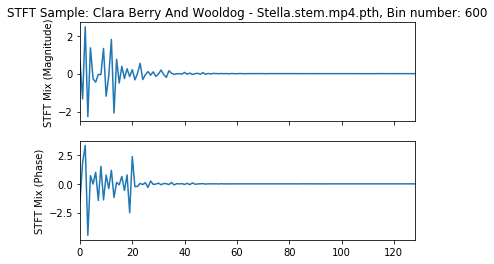

In [5]:
# sample viewer
idx = 0

sample = train_ds[idx]

print(f"{sample['mix'][0].shape}, {sample['mix'][1].shape}, {sample['mix'][2].shape}")
      
magnitude, phase, ac = sample['mix']
      
w_size = 512
w_no = 600
      
f, subplot = plt.subplots(2, sharex=True)
      
subplot[0].set_title("STFT Sample: {}, Bin number: {}".format(train_ds.filenames[idx], w_no))
subplot[0].plot(range(w_size), np.transpose(magnitude.detach()[0, 0, :, w_no].numpy()))
subplot[0].set_xlim([0, w_size/4]);
subplot[0].set_ylabel("STFT Mix (Magnitude)")
subplot[1].plot(range(w_size), np.transpose(phase.detach()[0, 0, :, w_no].numpy()))
subplot[1].set_ylabel("STFT Mix (Phase)")
      
plt.show()

torch.Size([512, 16843])


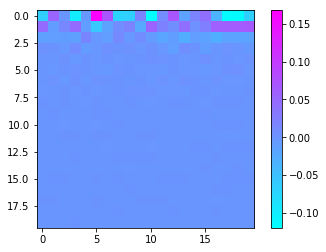

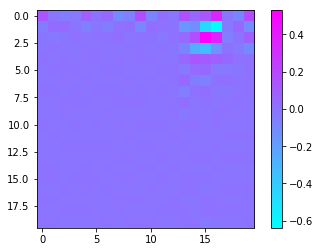

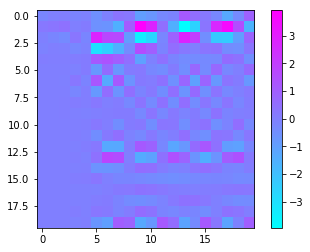

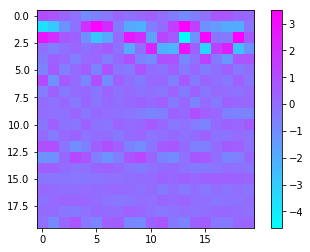

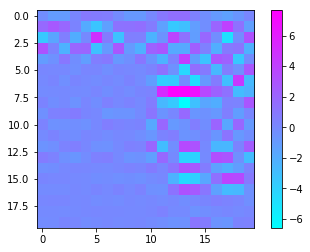

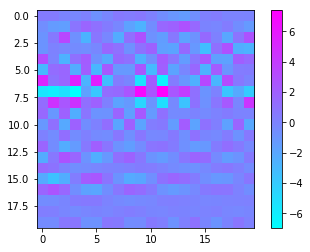

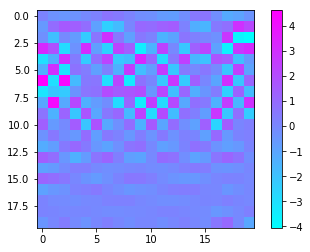

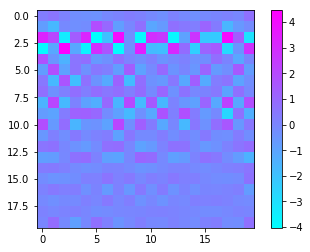

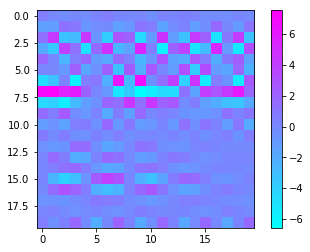

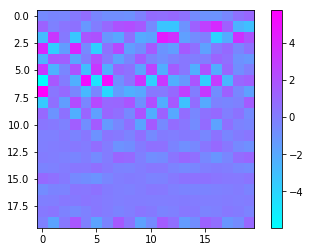

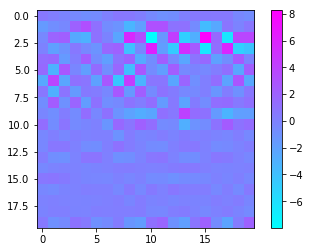

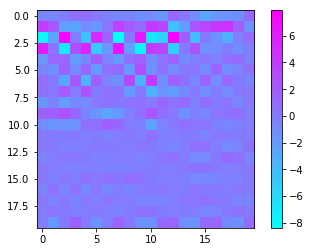

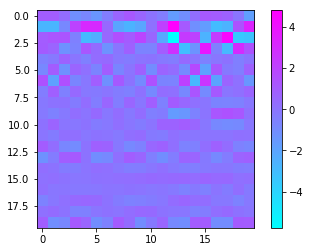

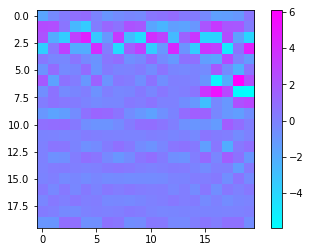

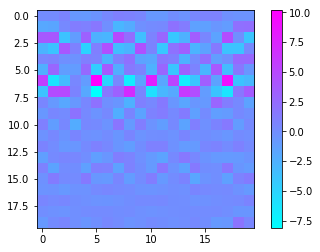

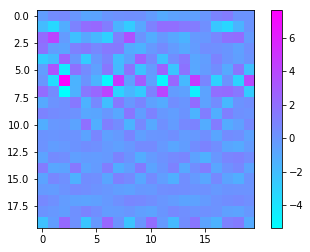

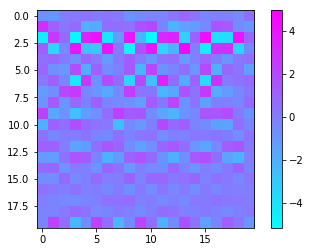

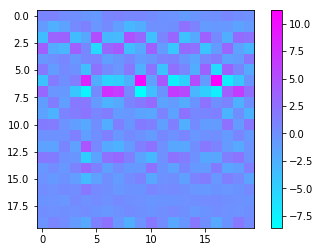

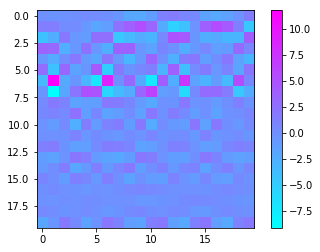

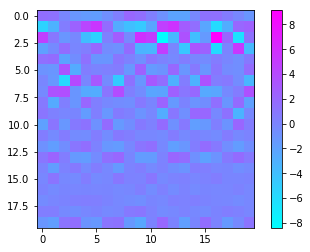

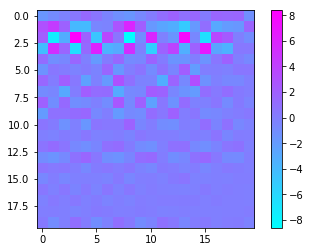

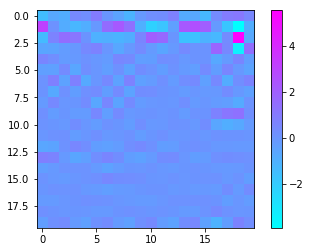

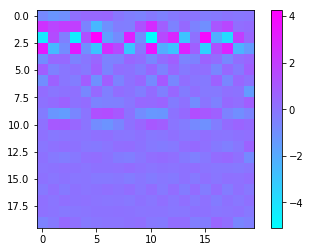

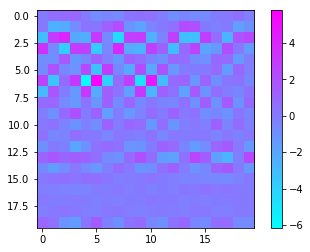

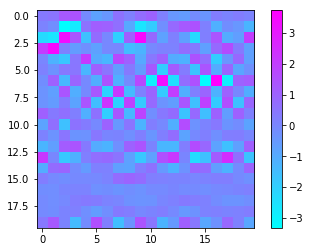

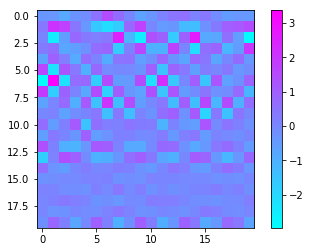

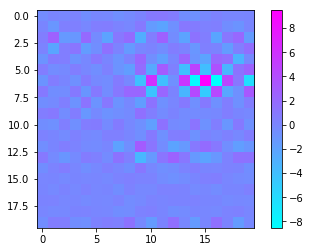

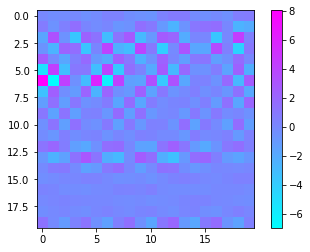

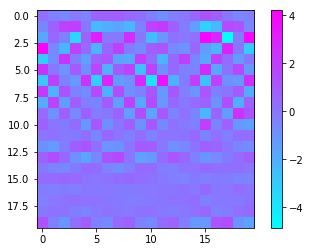

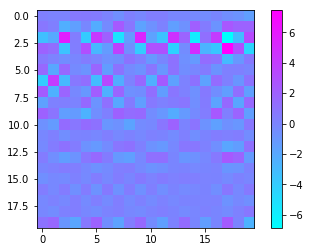

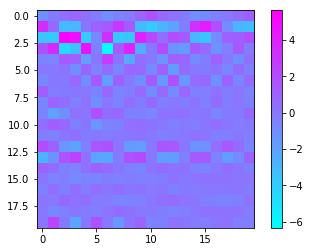

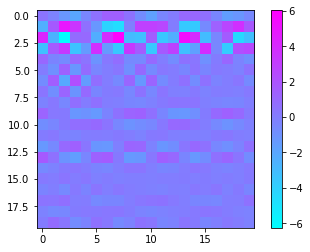

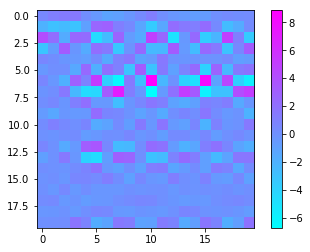

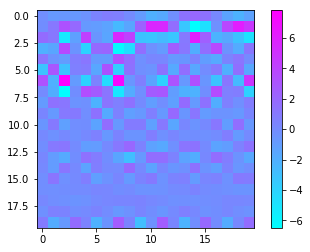

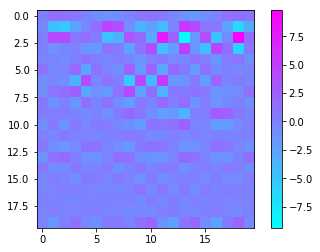

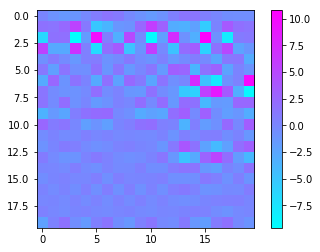

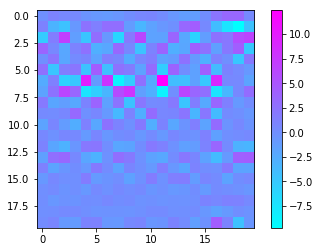

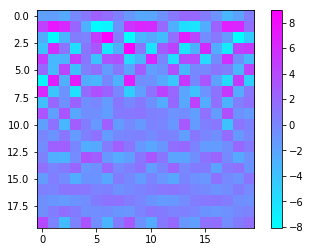

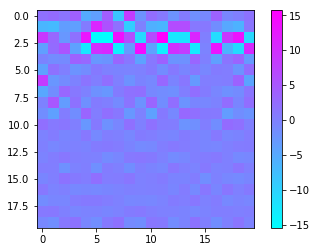

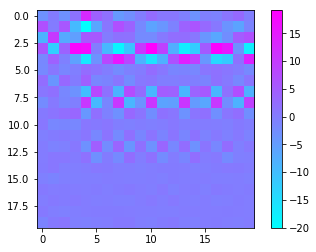

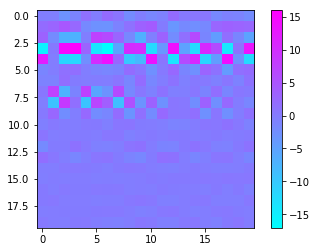

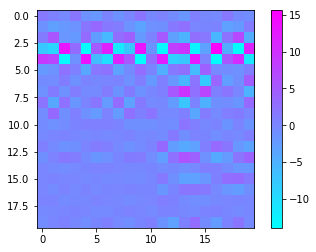

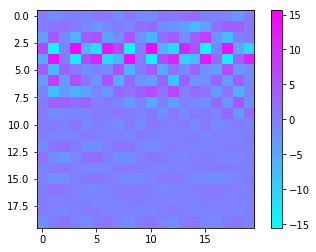

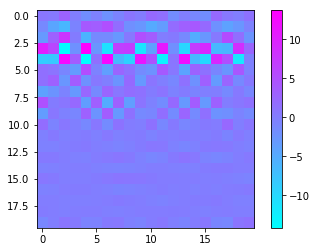

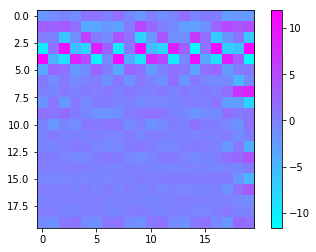

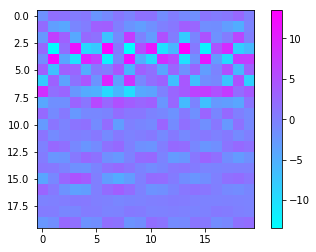

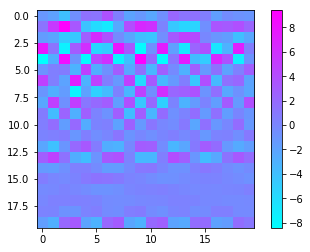

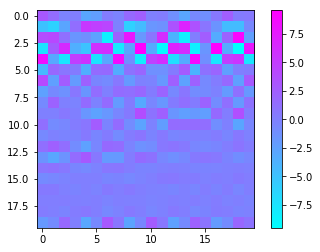

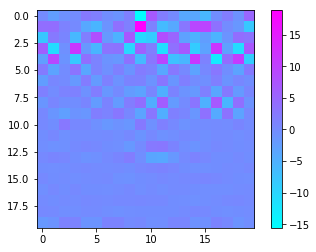

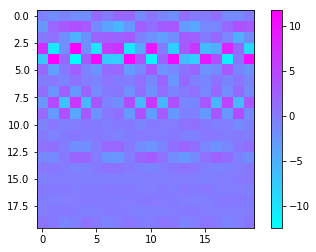

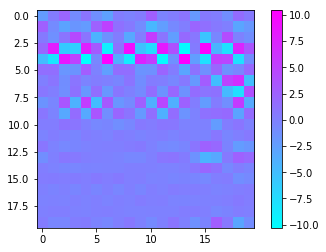

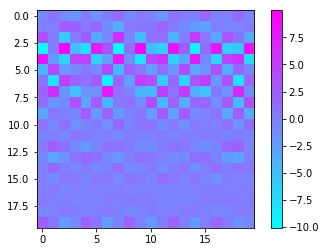

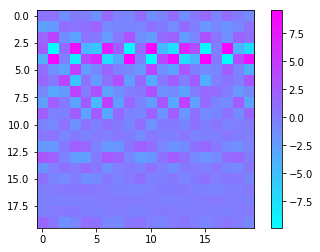

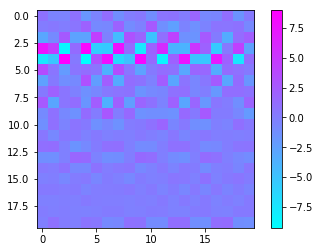

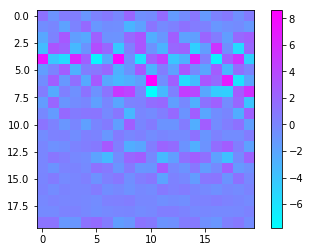

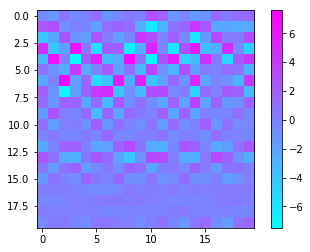

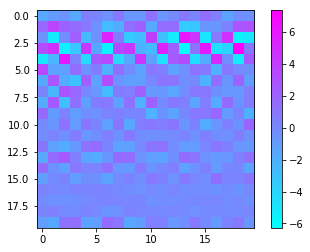

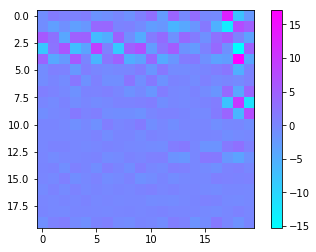

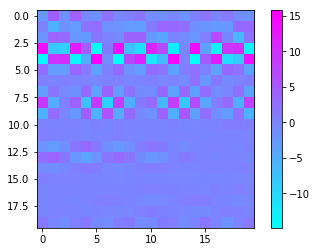

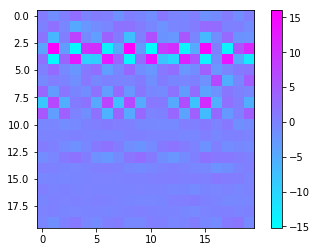

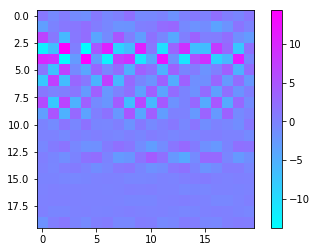

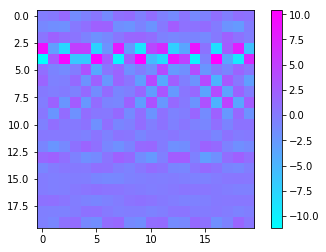

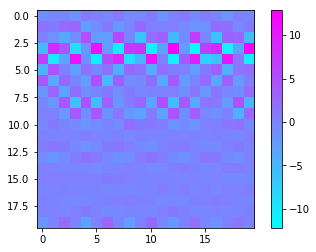

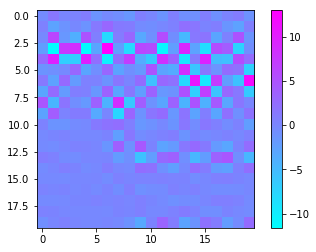

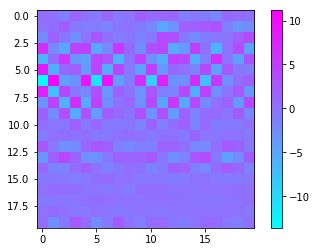

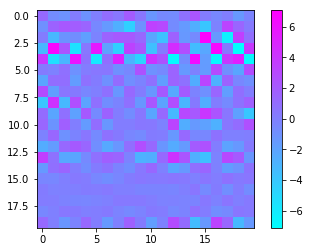

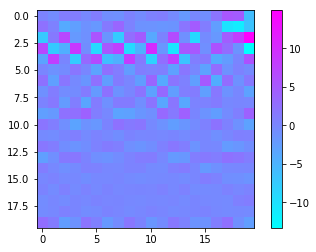

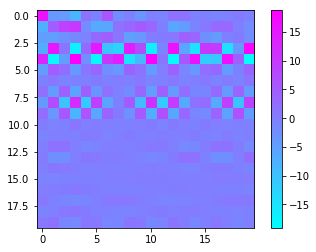

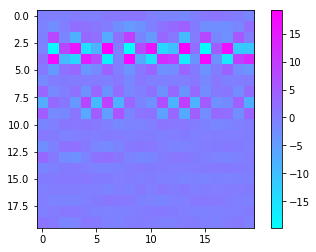

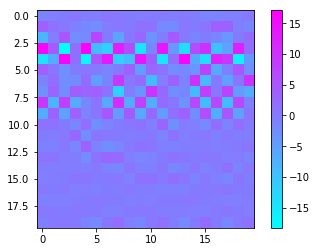

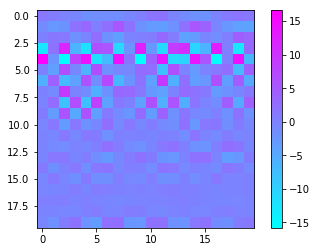

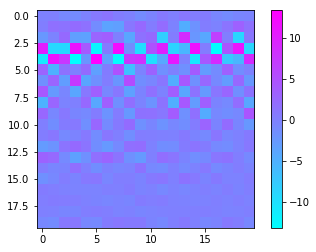

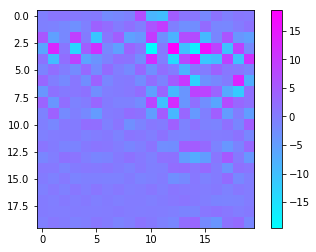

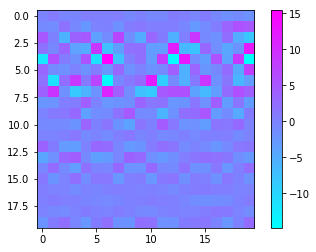

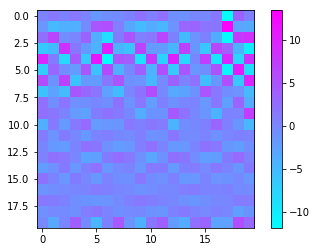

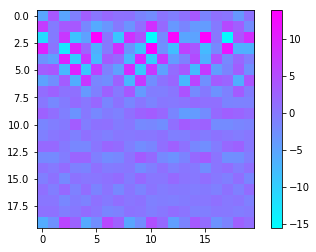

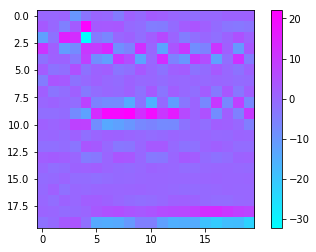

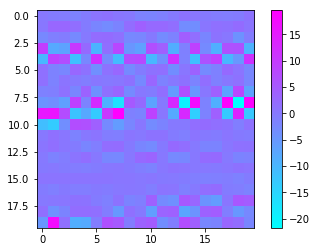

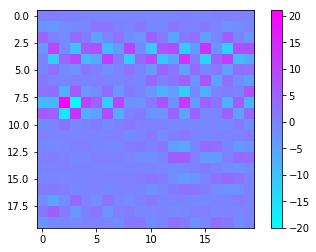

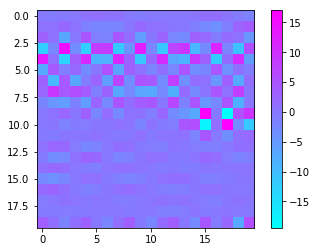

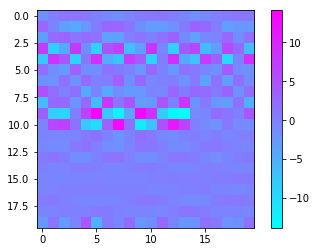

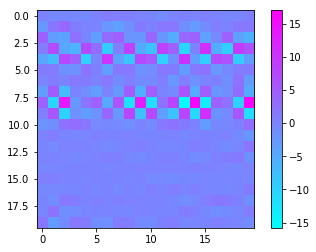

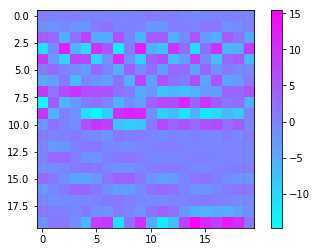

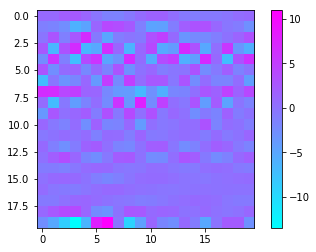

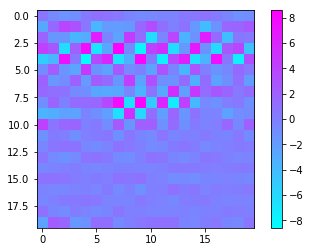

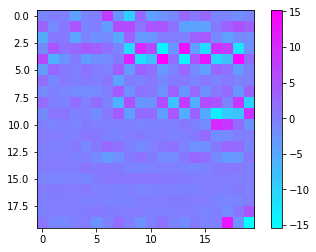

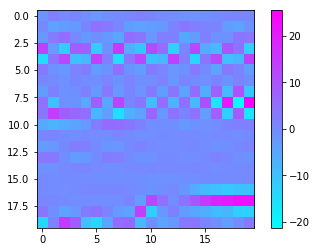

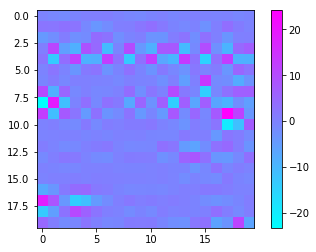

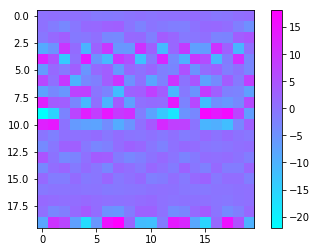

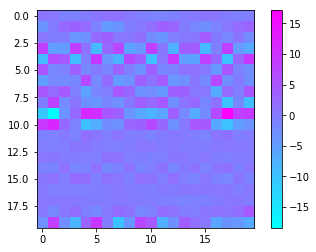

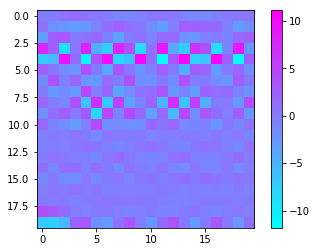

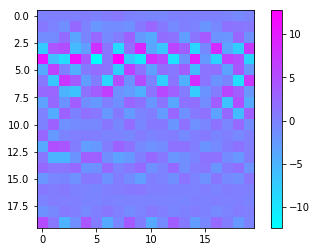

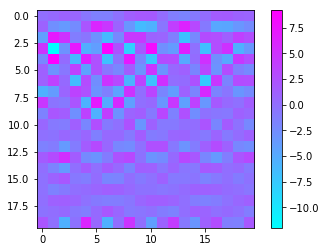

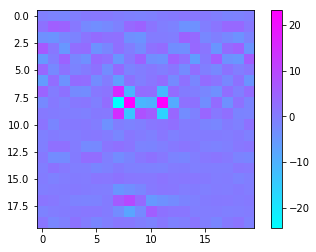

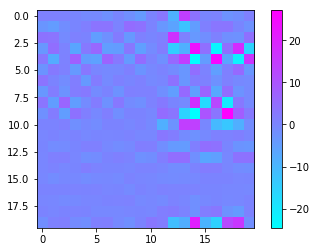

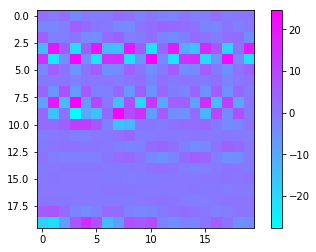

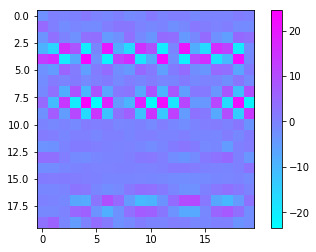

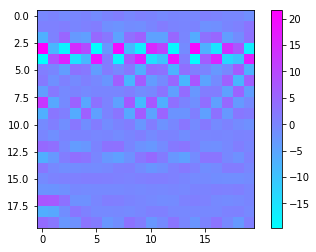

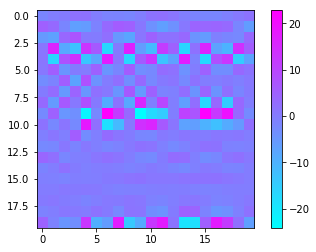

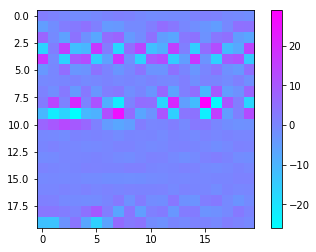

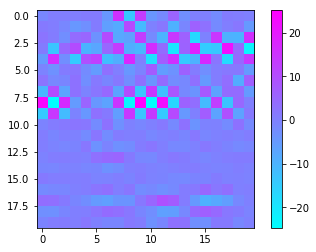

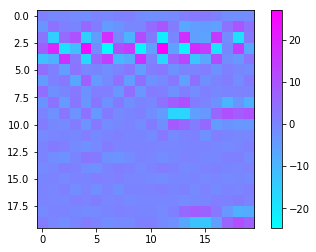

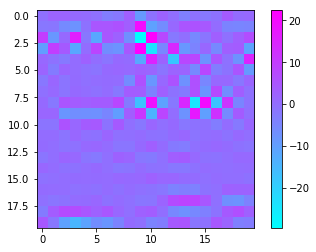

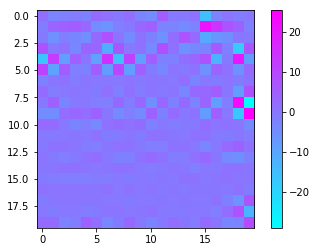

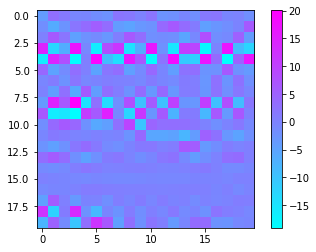

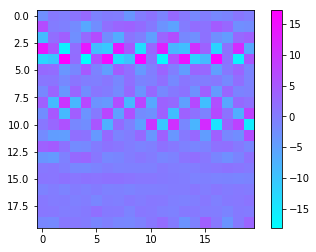

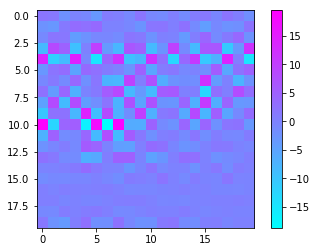

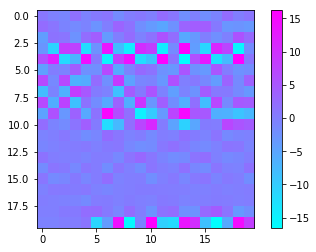

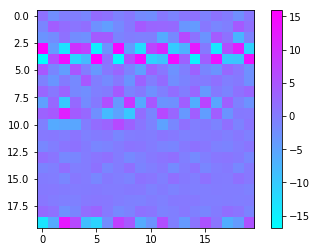

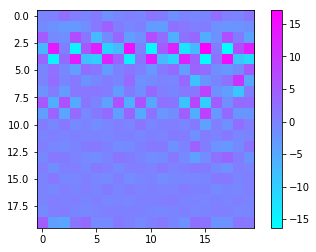

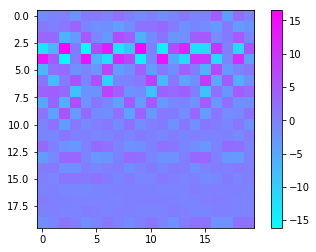

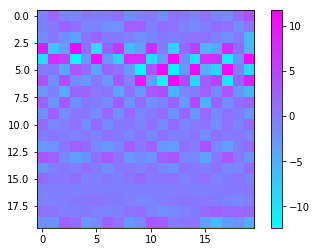

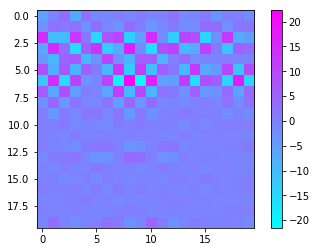

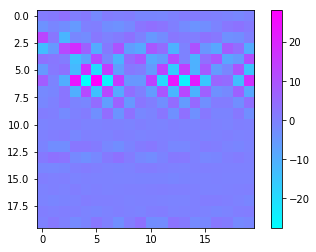

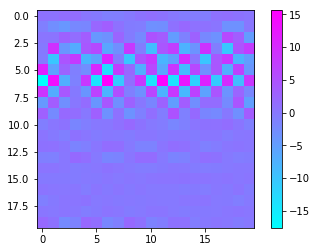

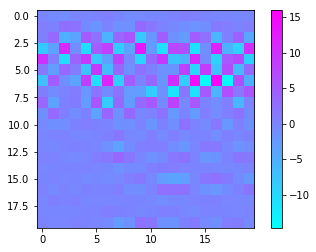

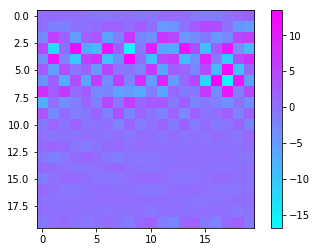

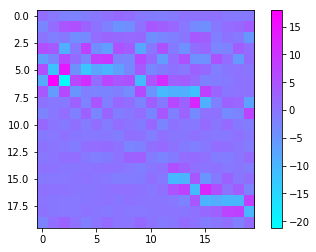

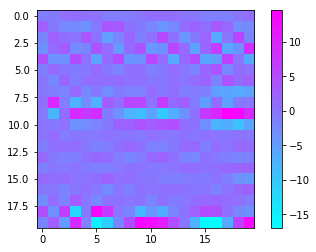

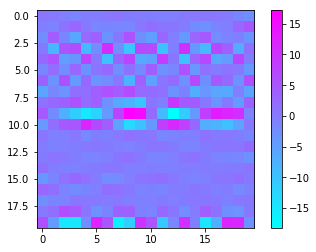

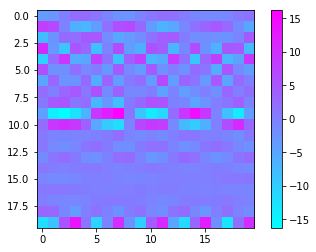

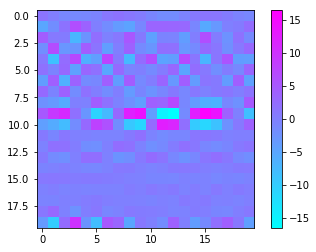

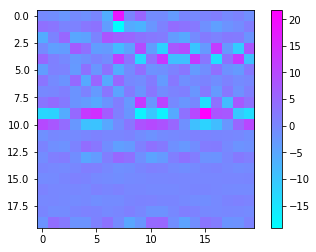

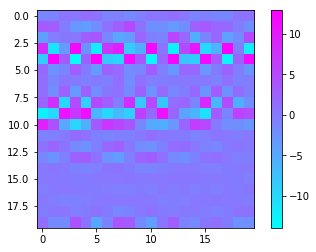

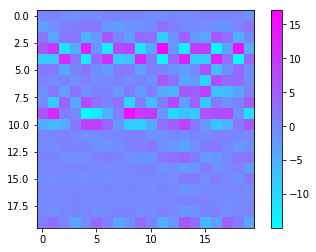

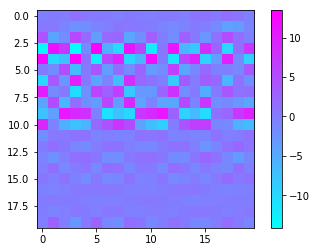

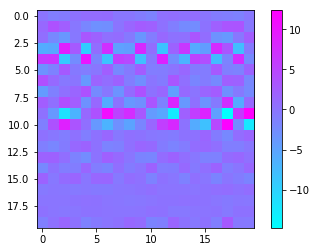

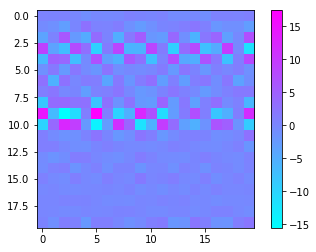

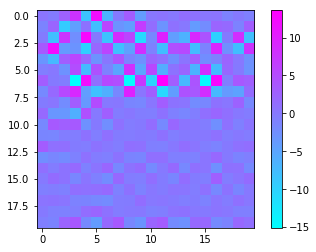

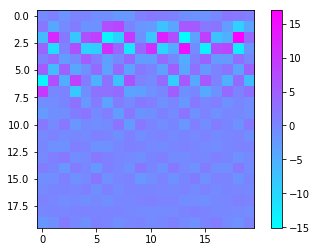

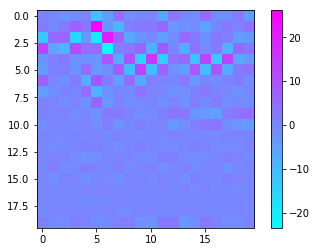

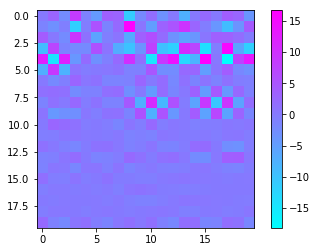

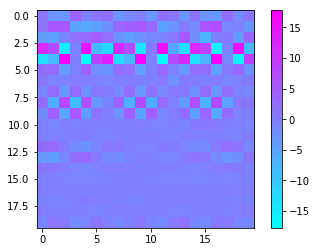

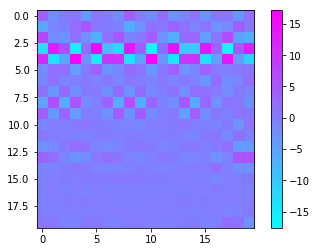

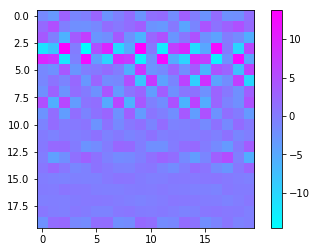

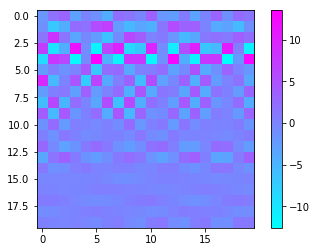

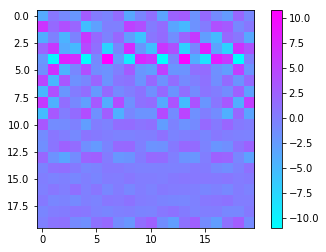

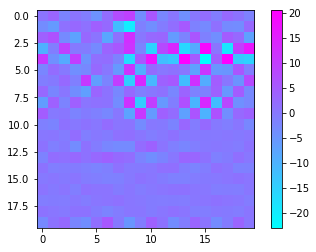

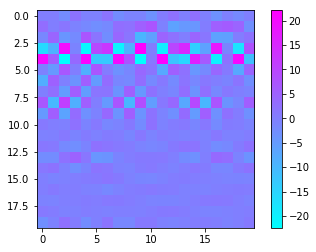

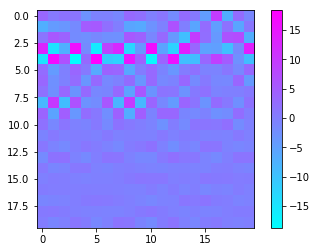

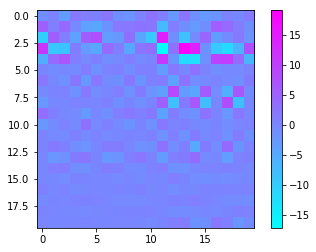

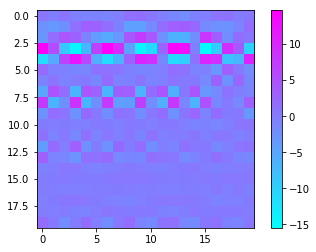

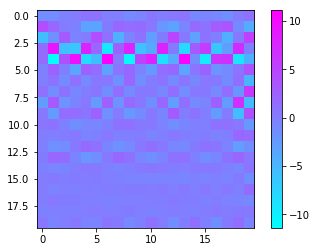

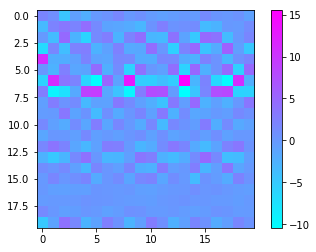

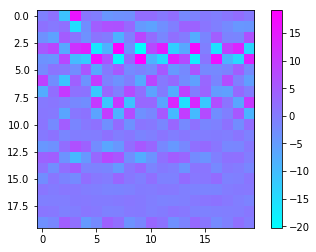

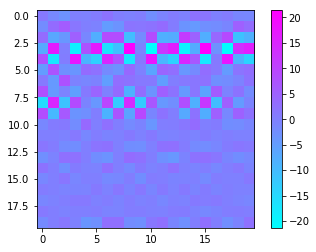

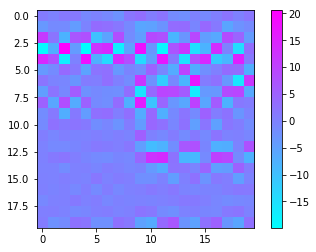

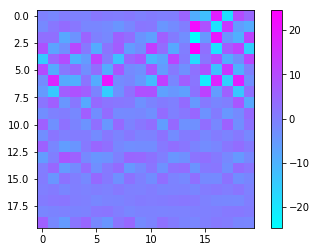

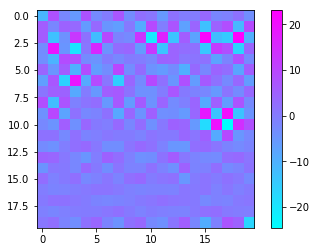

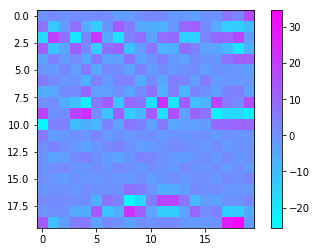

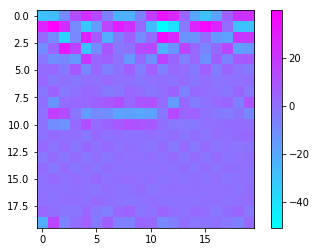

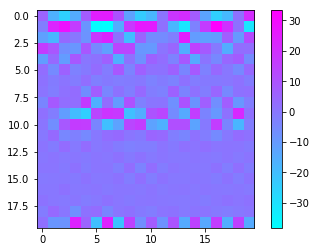

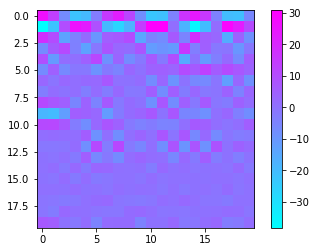

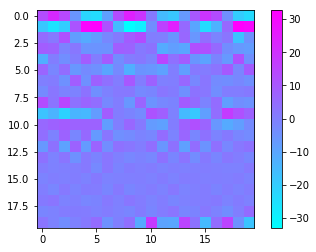

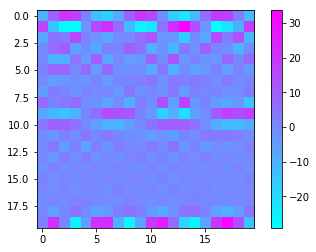

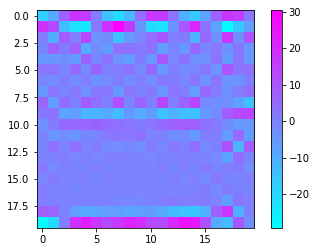

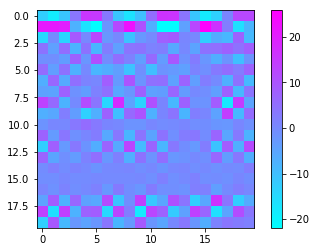

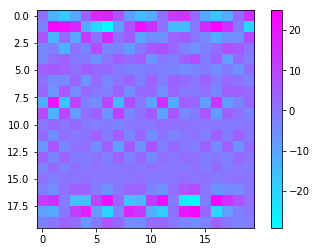

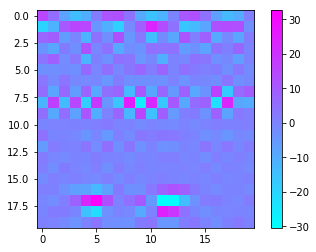

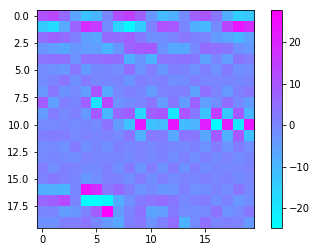

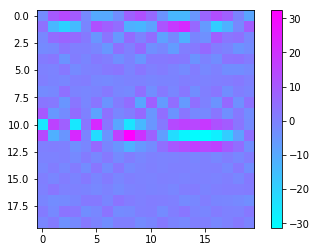

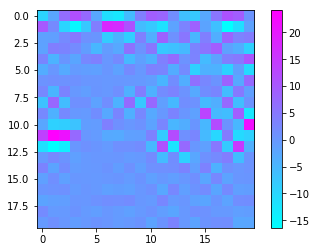

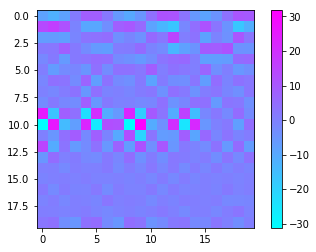

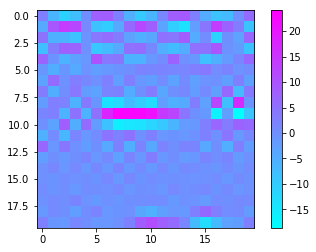

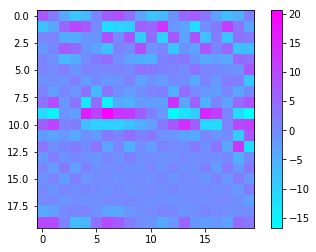

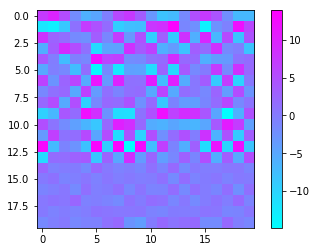

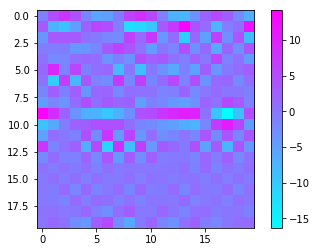

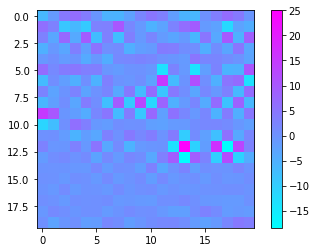

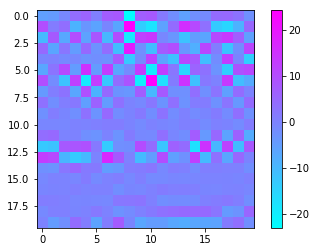

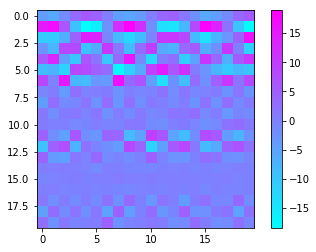

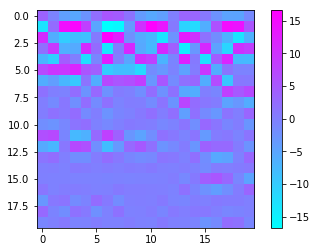

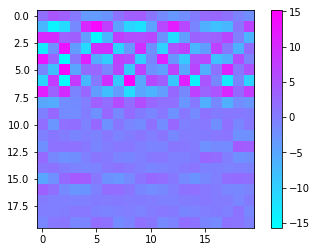

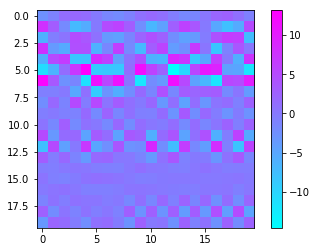

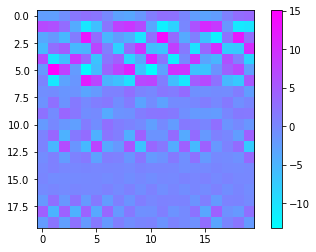

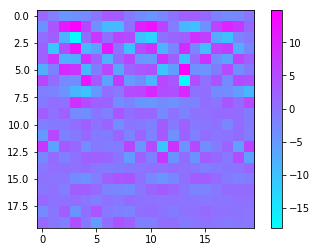

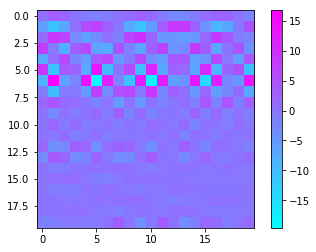

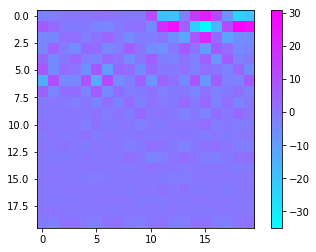

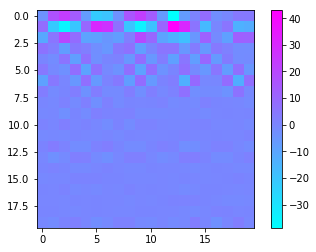

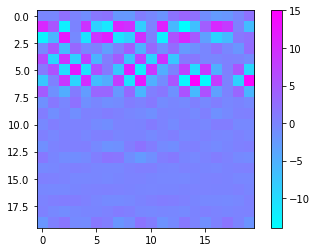

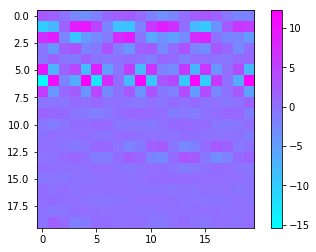

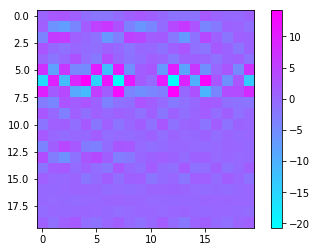

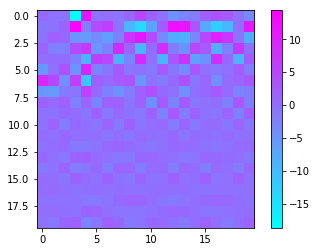

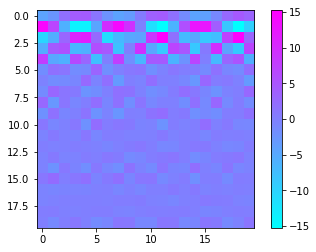

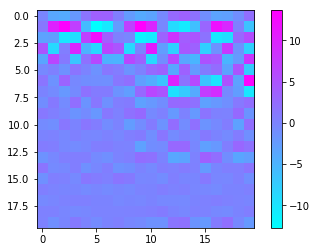

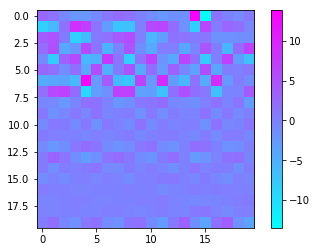

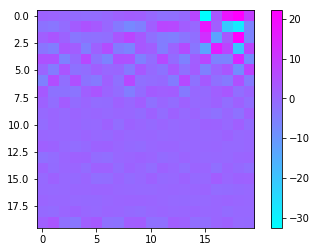

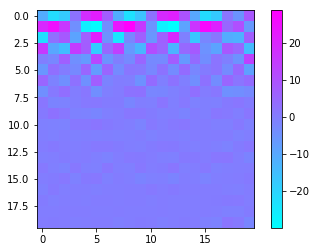

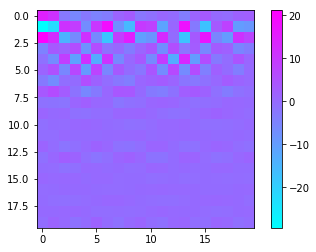

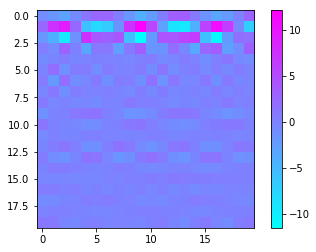

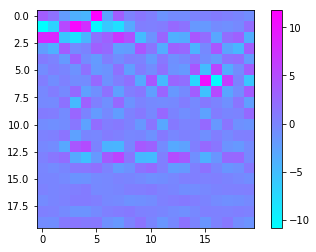

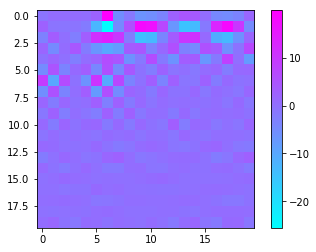

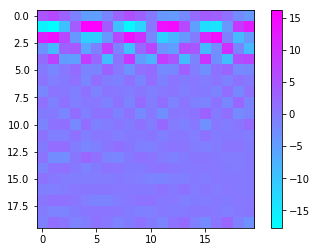

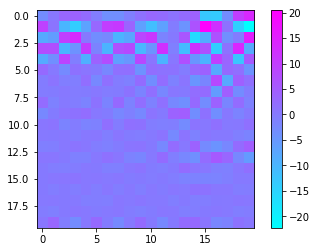

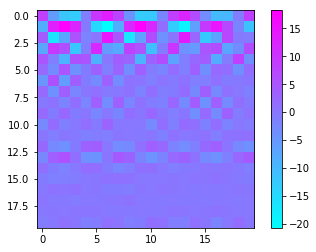

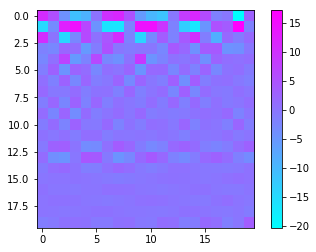

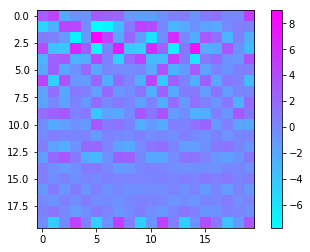

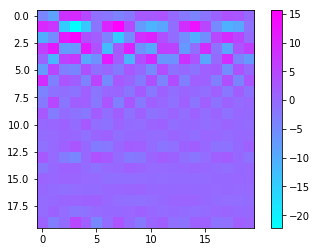

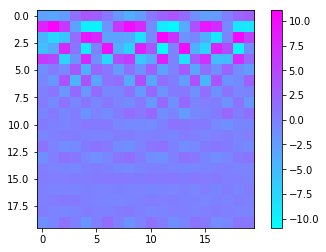

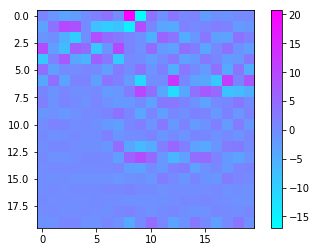

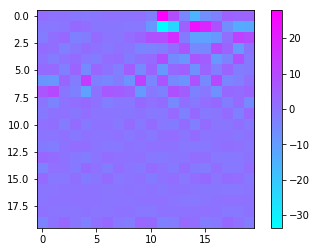

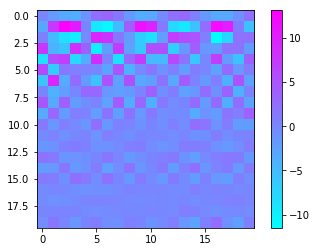

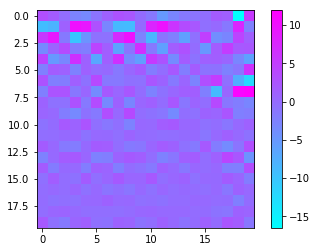

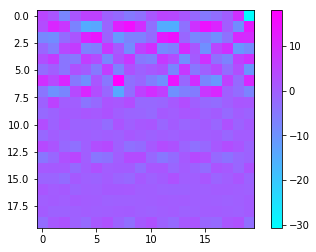

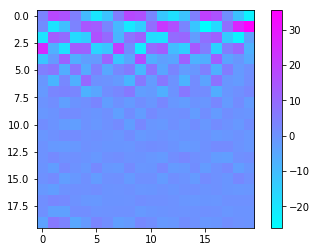

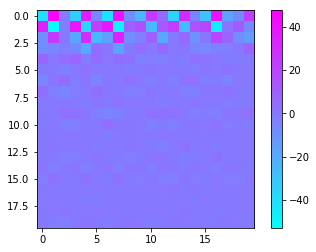

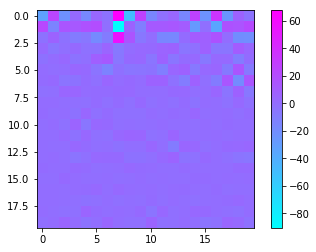

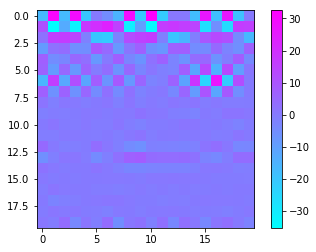

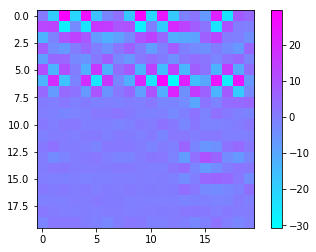

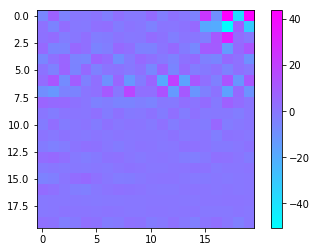

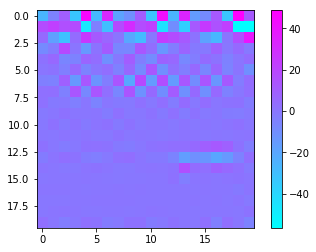

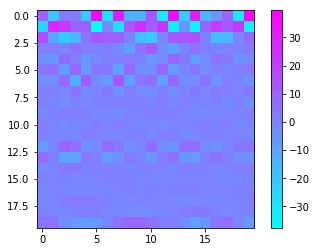

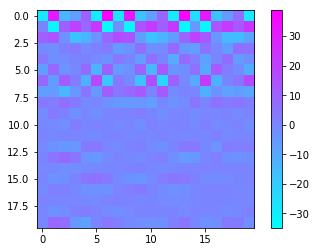

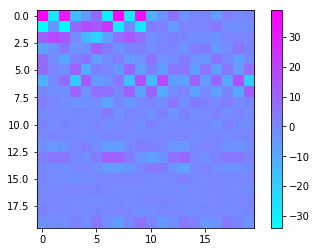

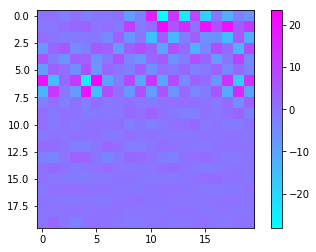

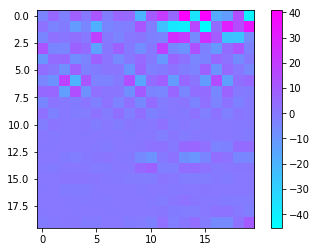

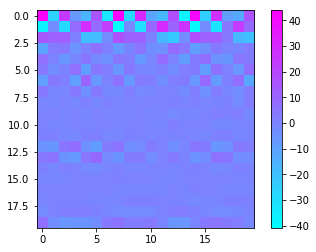

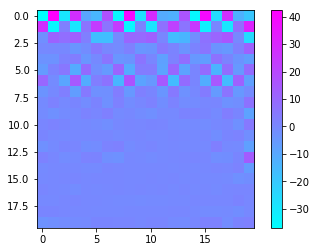

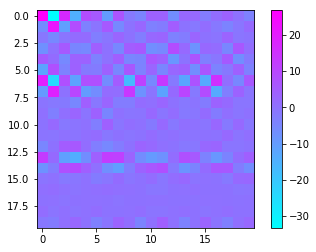

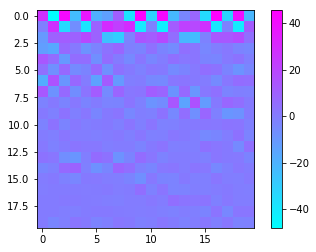

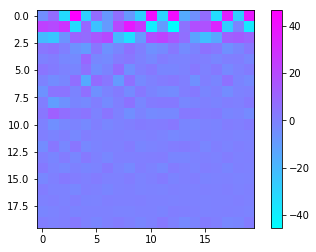

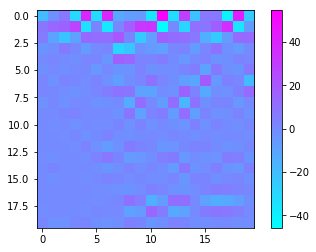

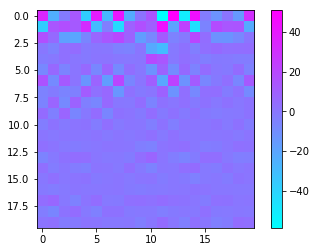

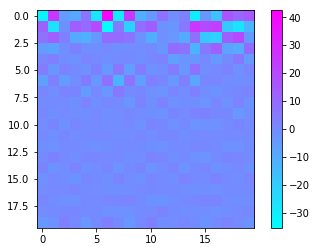

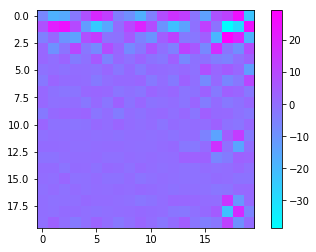

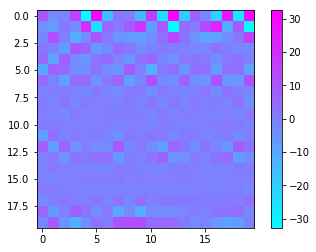

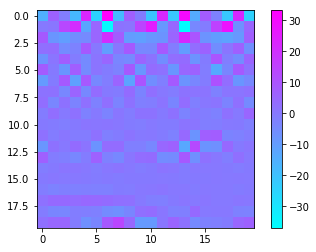

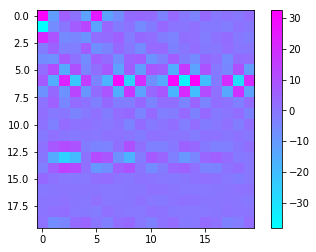

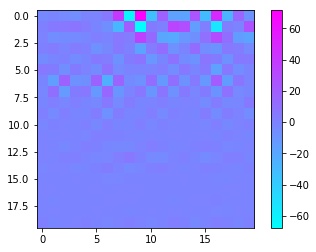

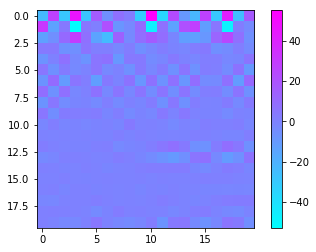

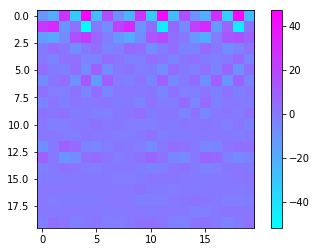

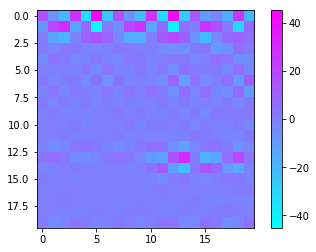

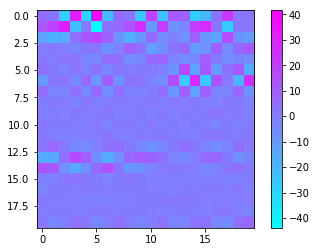

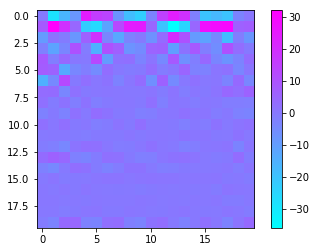

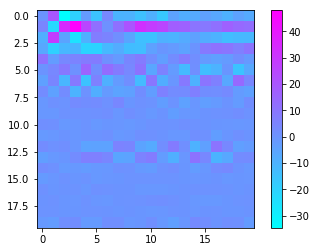

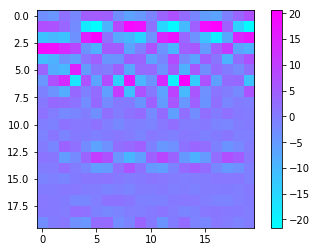

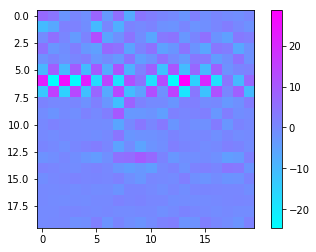

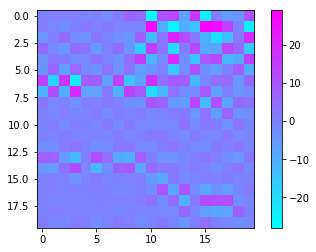

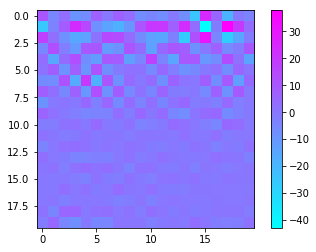

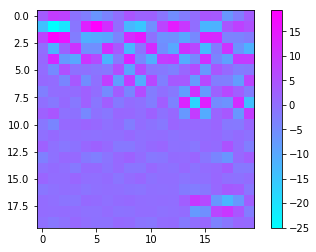

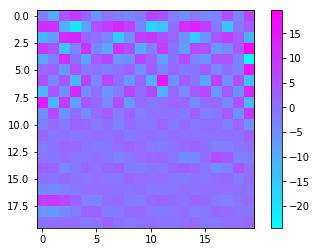

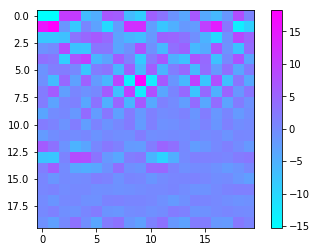

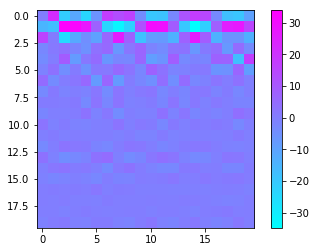

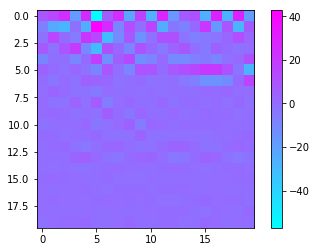

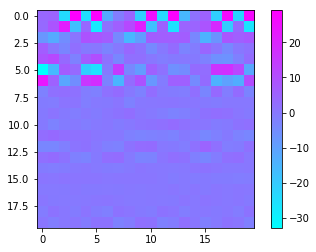

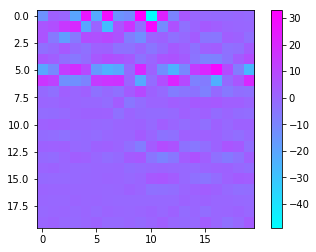

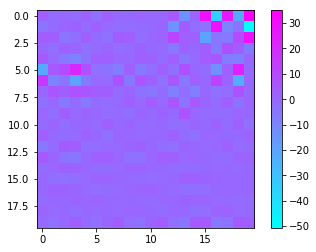

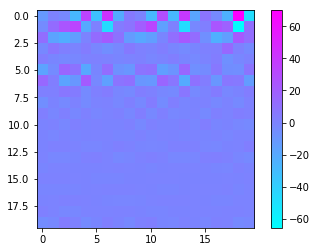

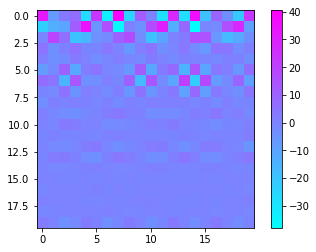

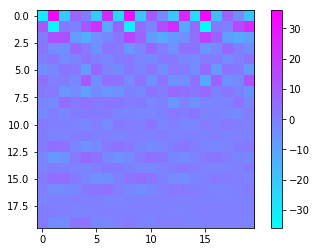

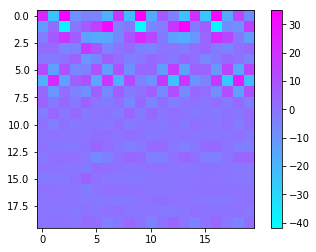

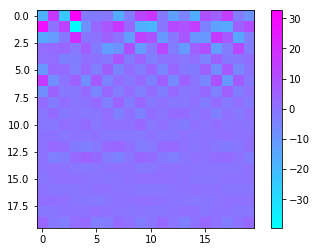

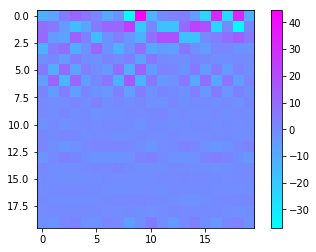

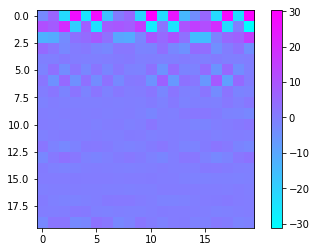

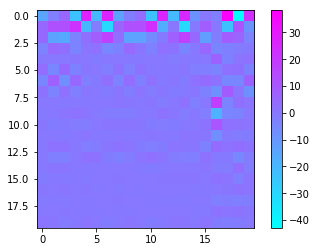

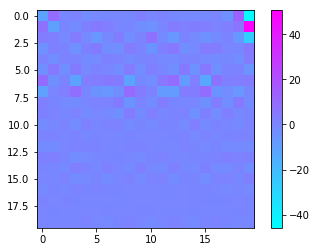

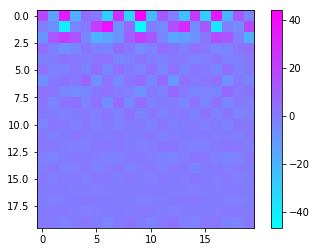

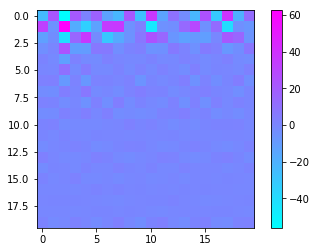

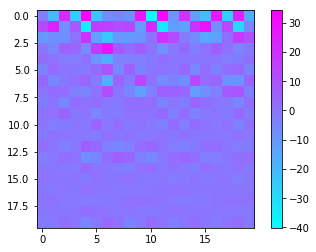

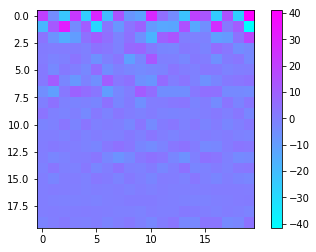

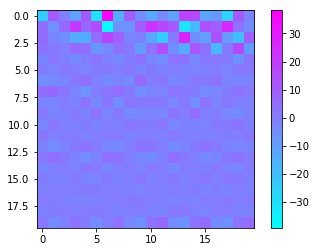

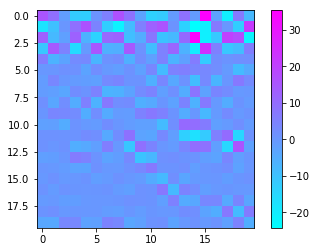

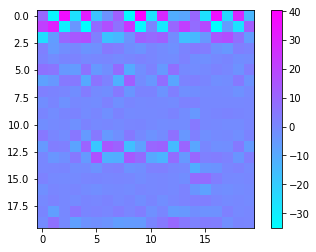

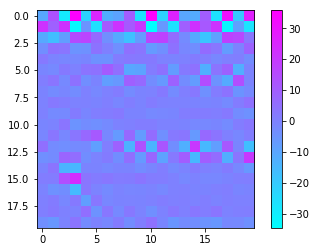

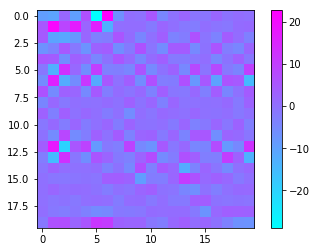

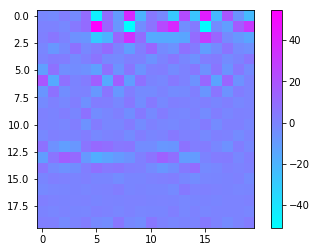

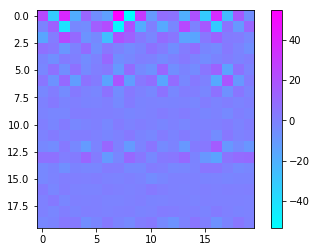

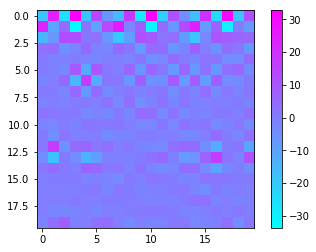

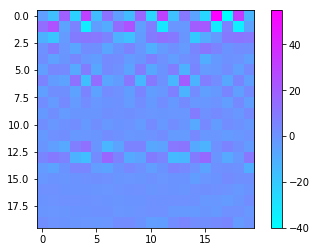

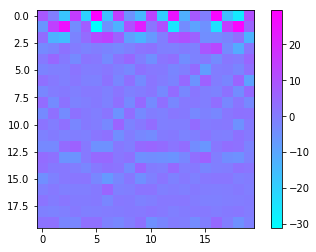

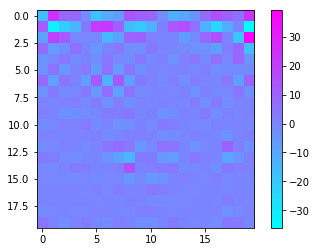

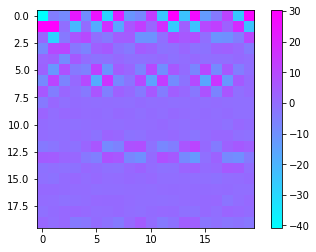

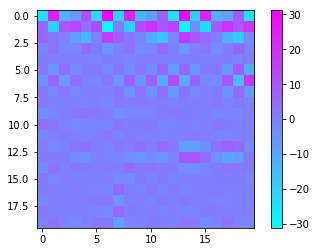

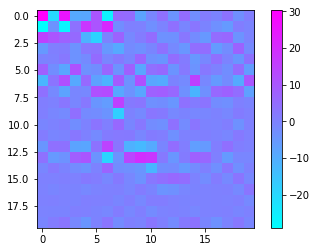

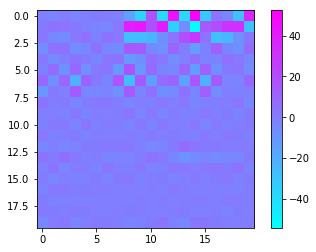

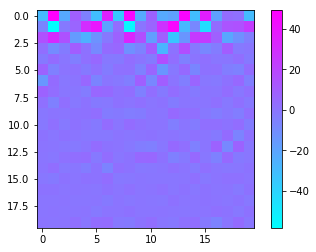

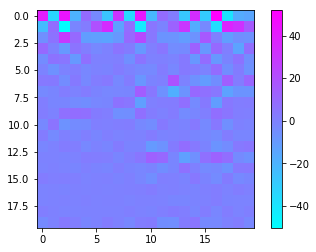

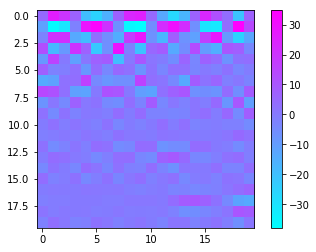

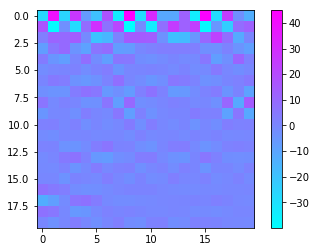

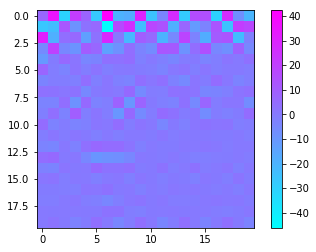

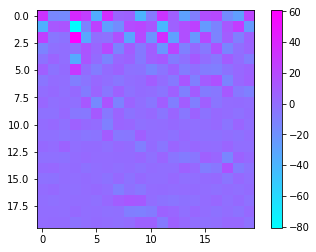

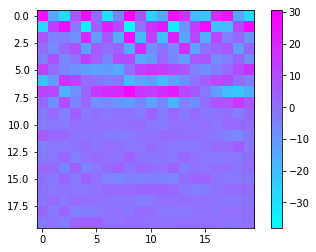

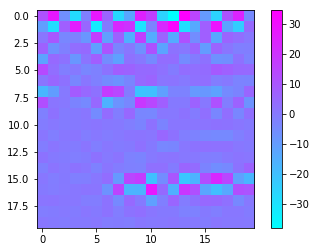

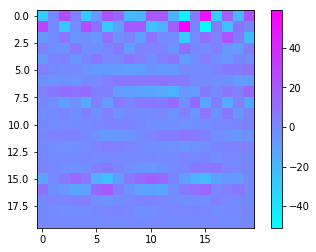

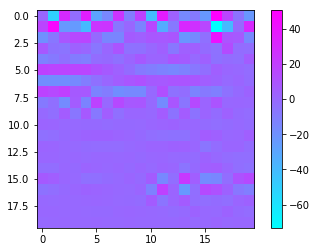

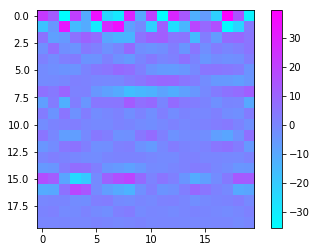

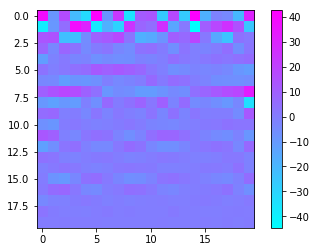

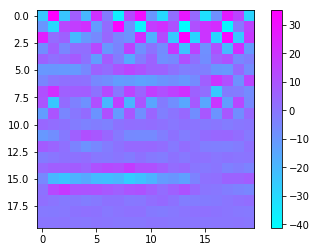

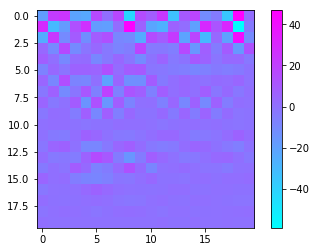

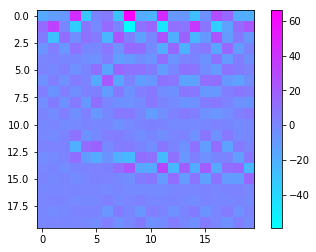

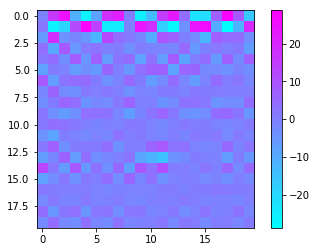

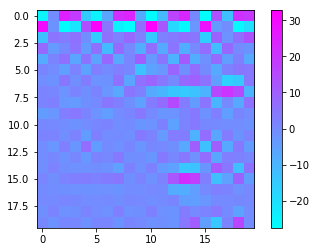

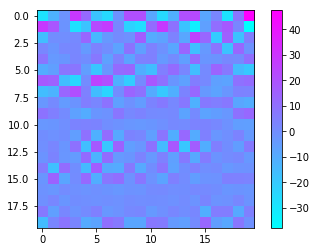

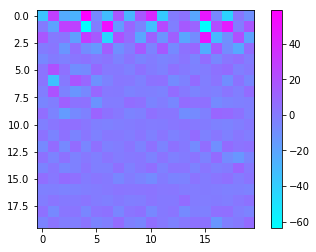

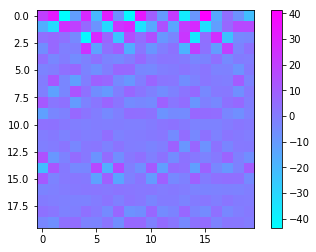

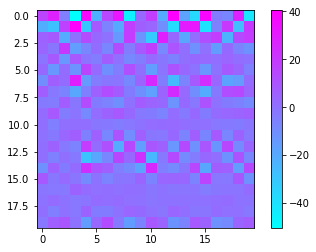

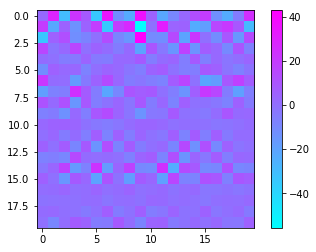

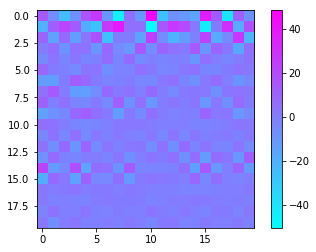

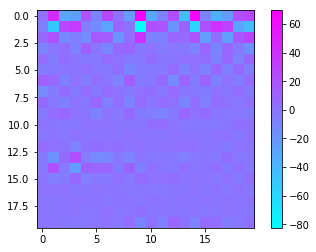

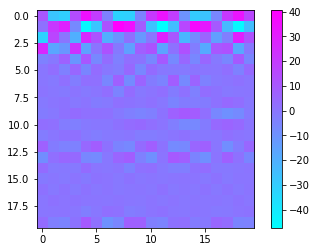

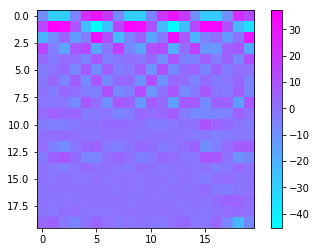

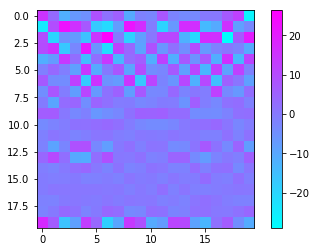

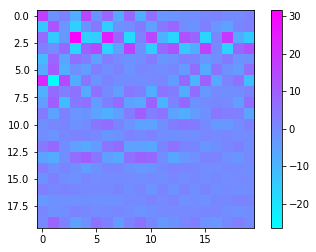

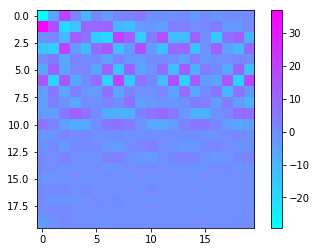

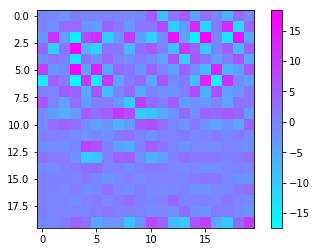

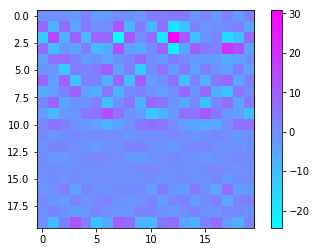

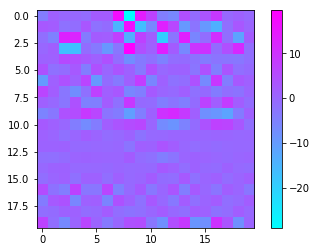

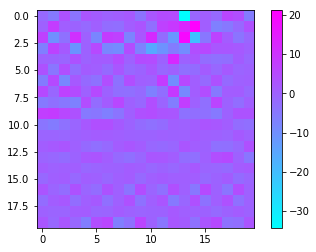

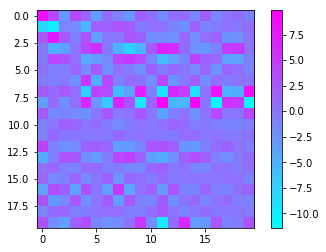

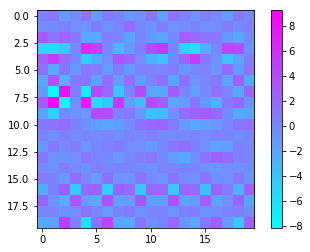

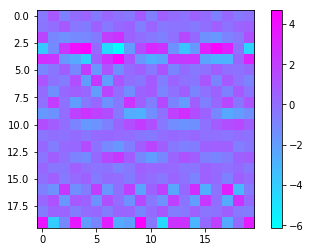

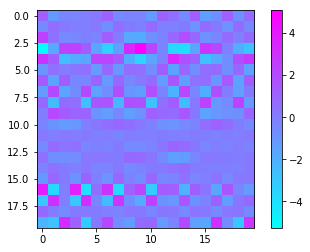

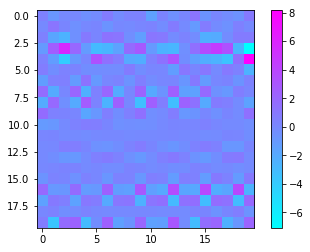

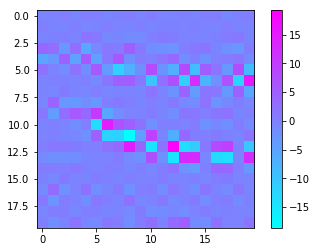

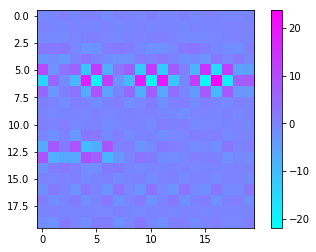

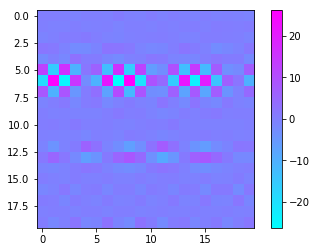

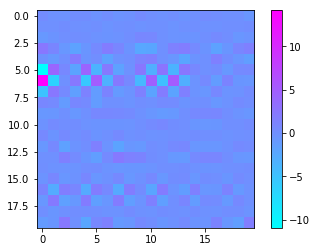

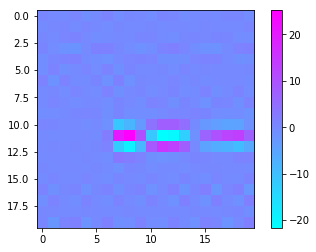

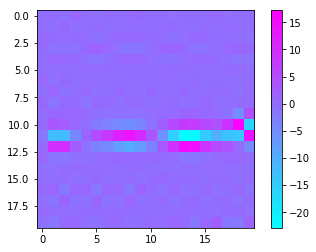

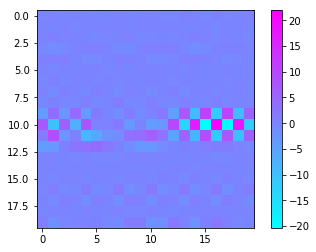

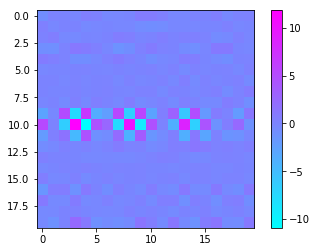

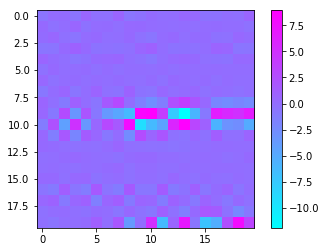

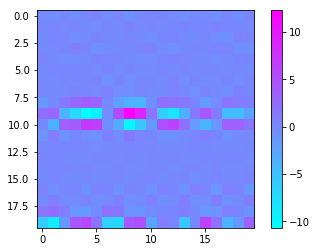

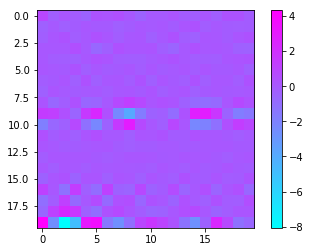

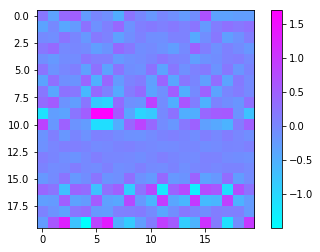

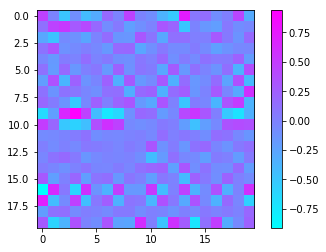

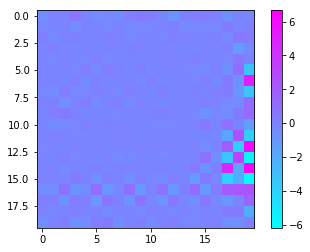

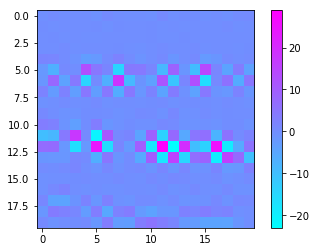

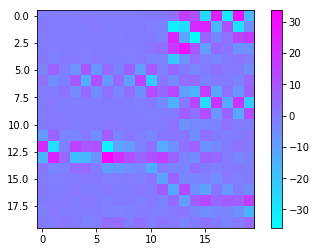

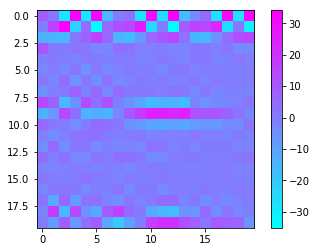

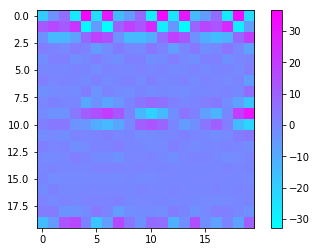

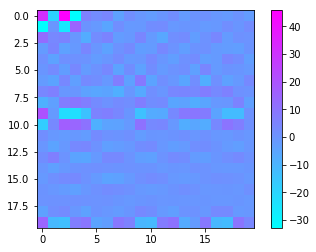

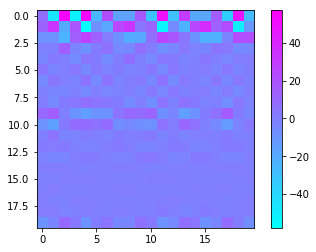

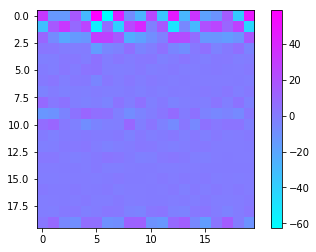

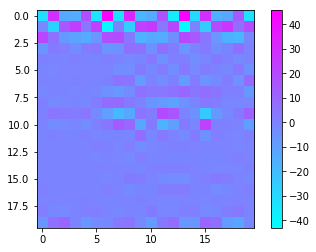

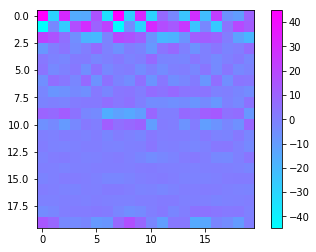

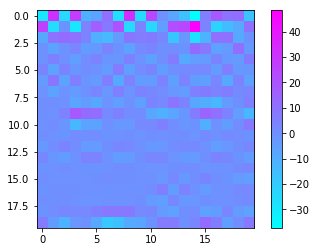

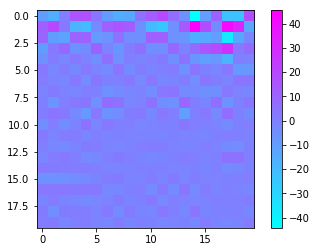

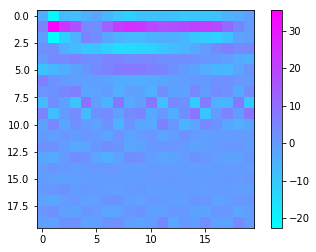

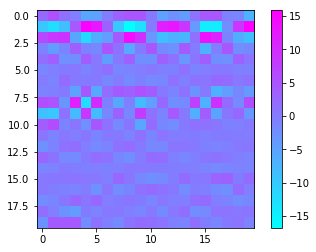

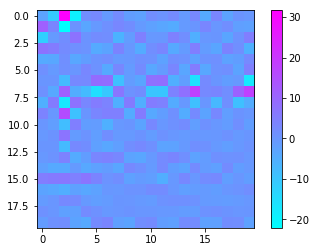

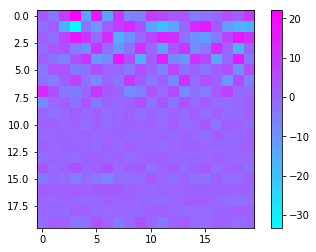

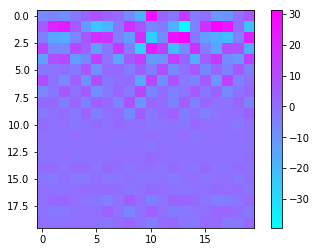

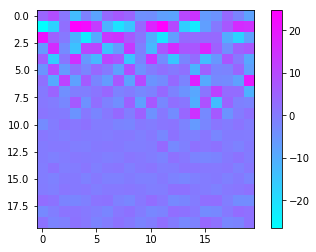

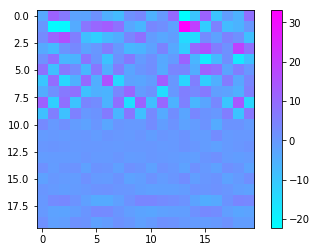

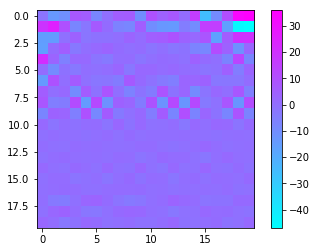

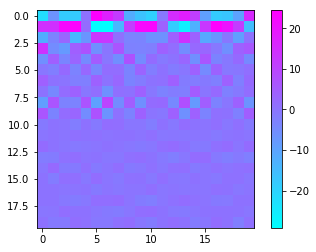

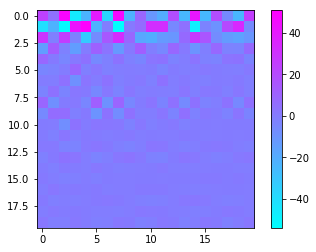

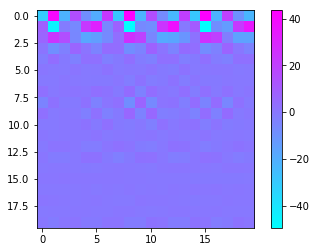

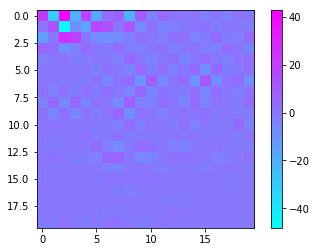

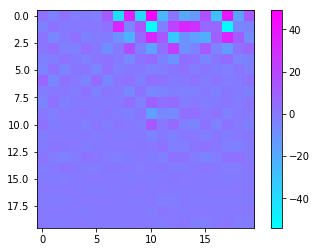

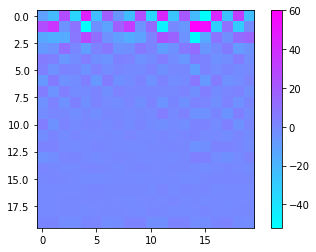

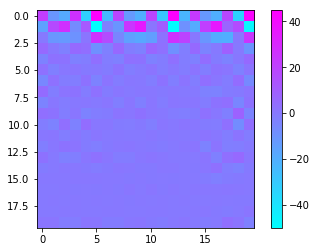

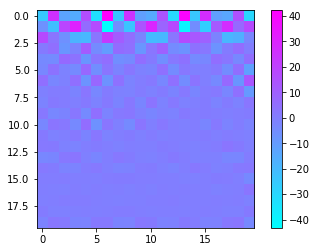

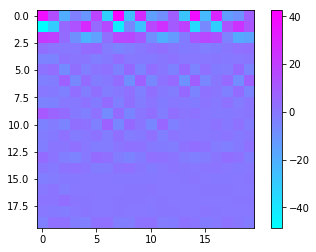

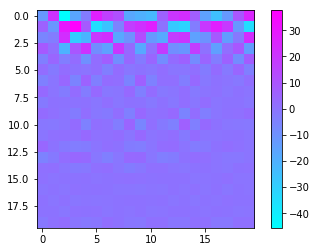

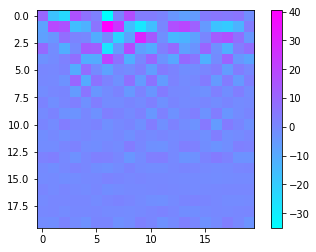

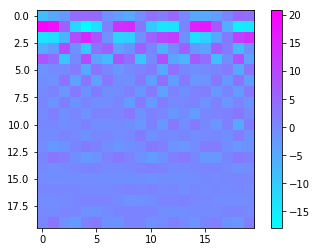

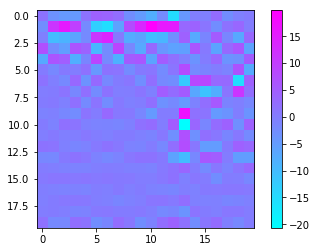

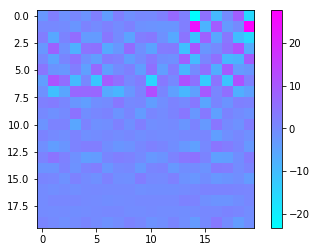

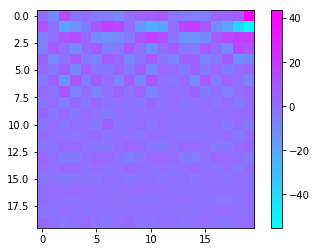

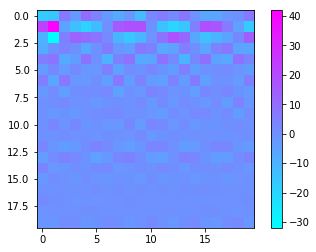

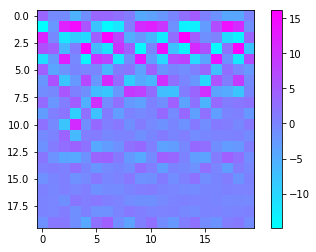

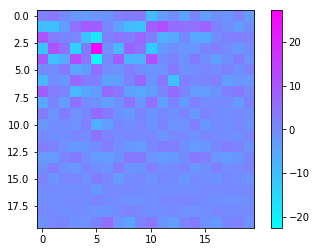

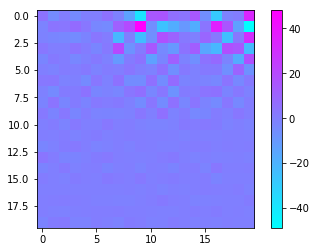

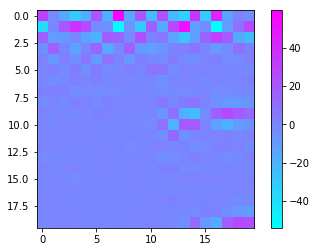

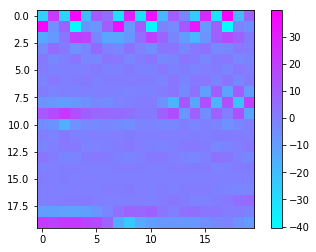

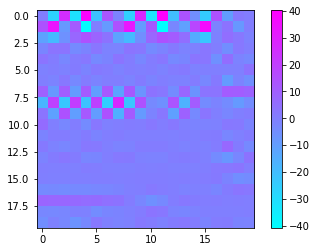

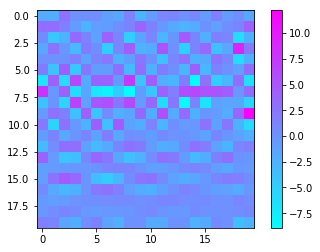

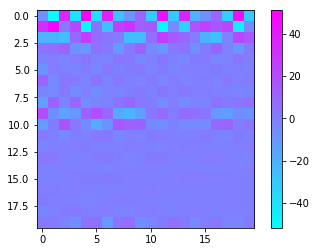

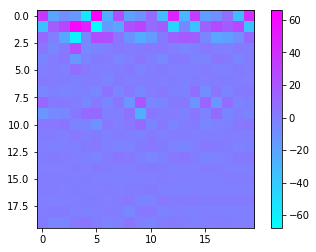

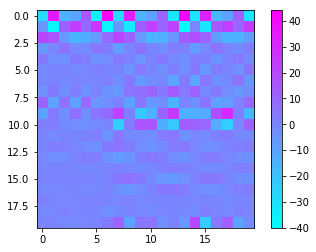

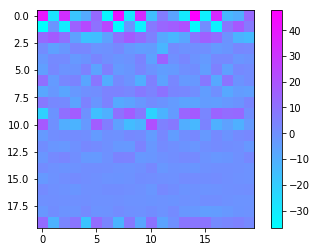

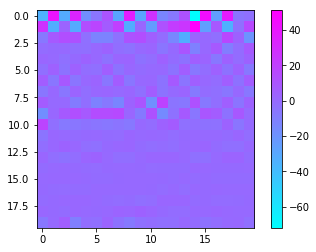

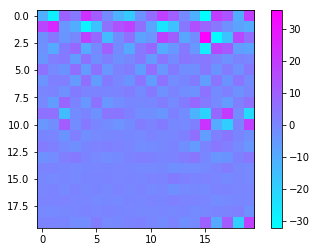

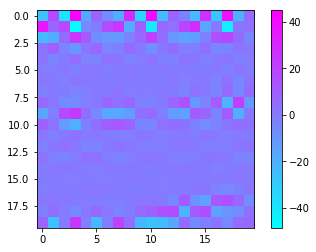

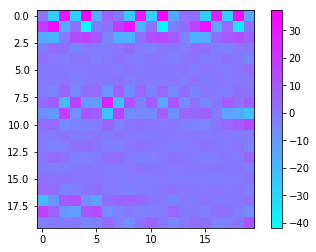

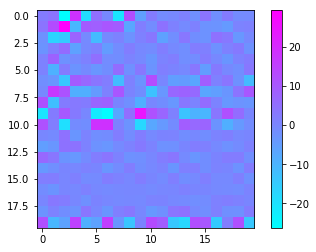

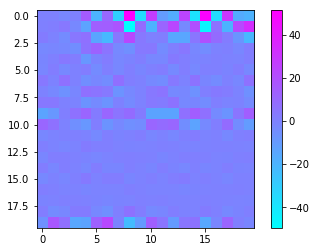

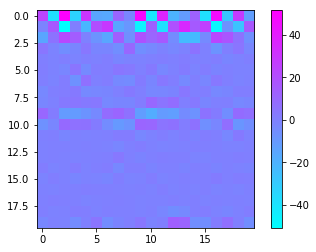

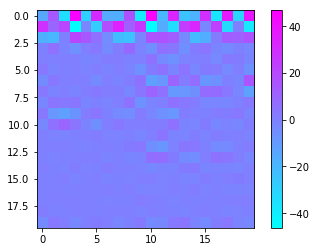

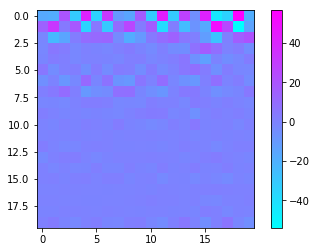

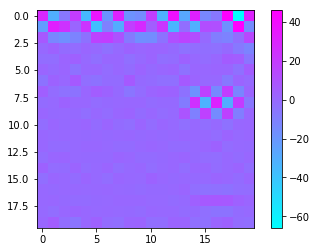

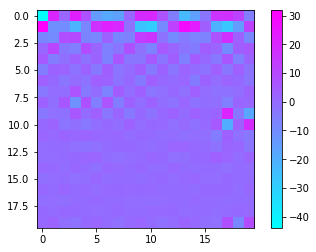

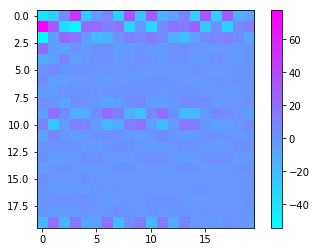

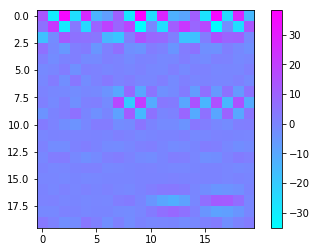

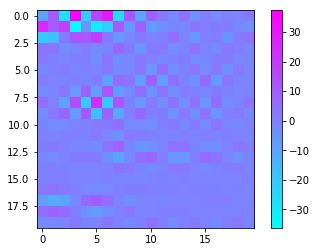

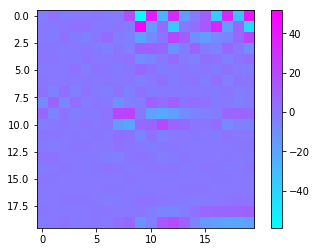

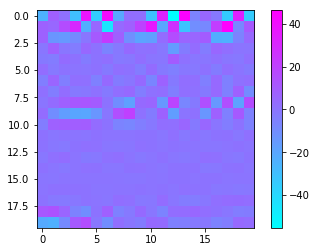

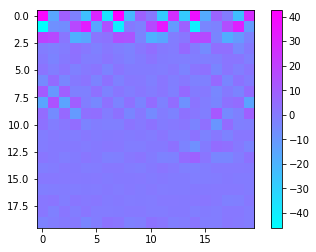

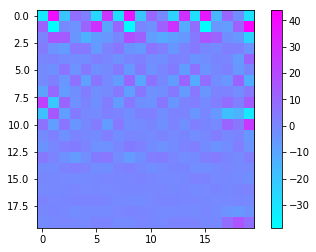

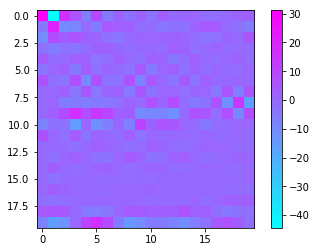

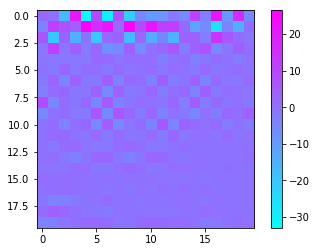

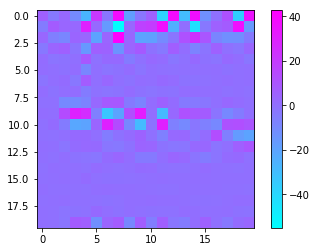

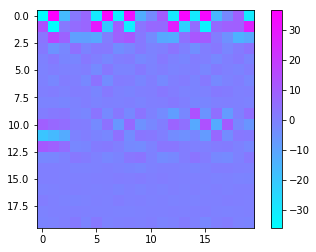

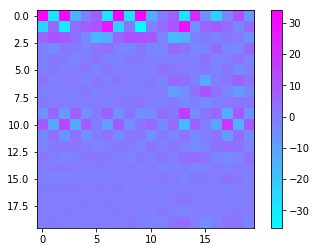

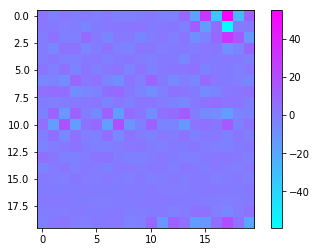

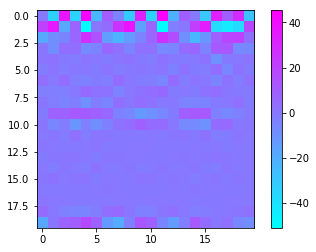

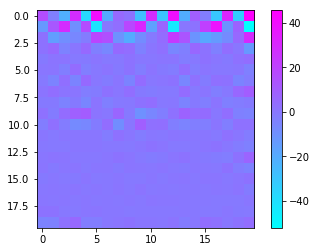

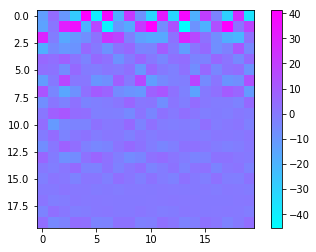

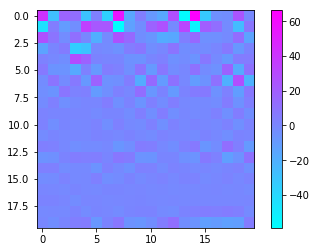

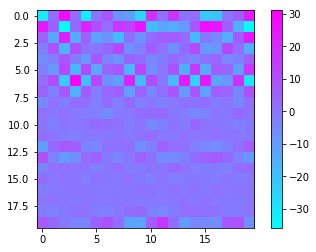

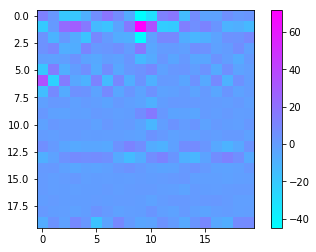

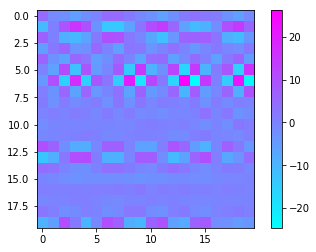

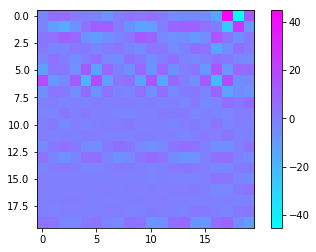

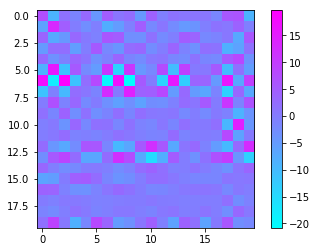

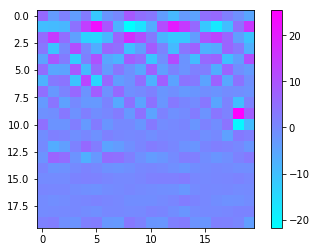

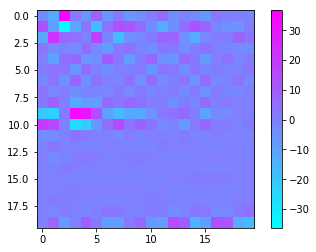

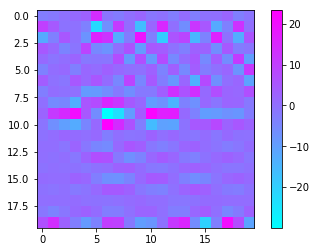

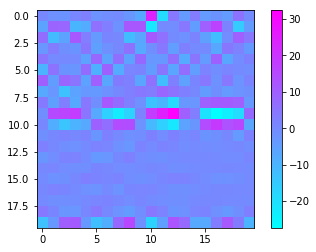

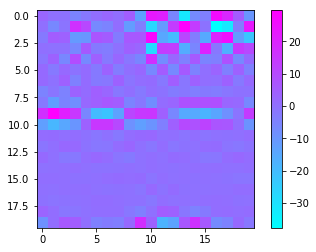

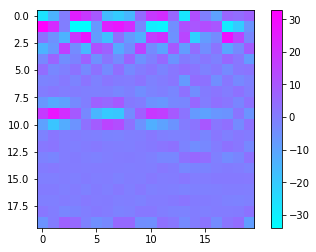

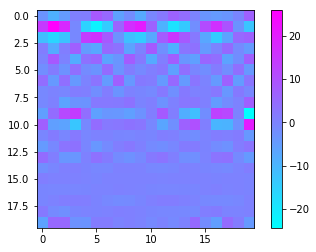

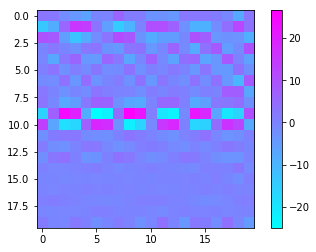

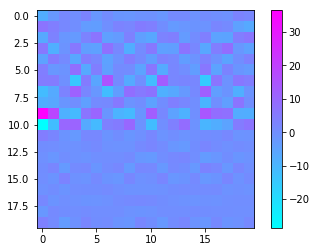

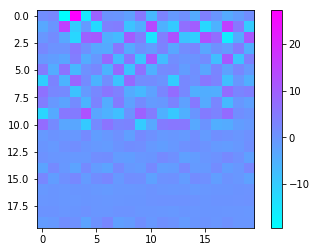

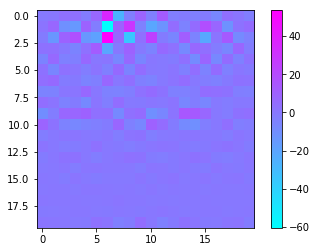

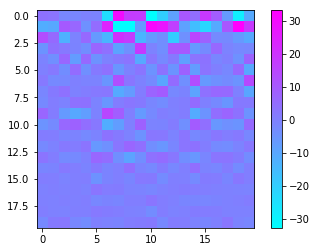

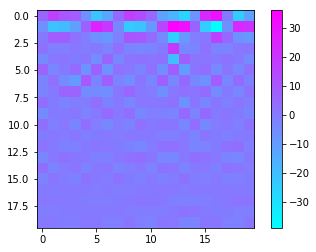

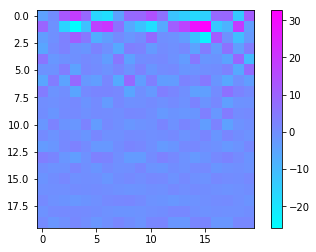

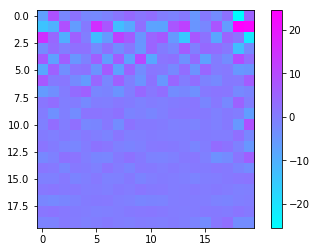

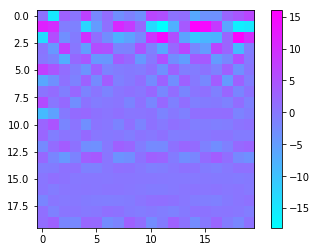

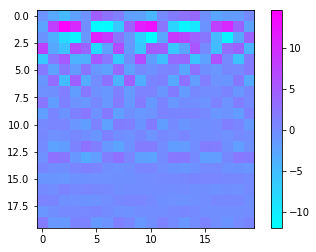

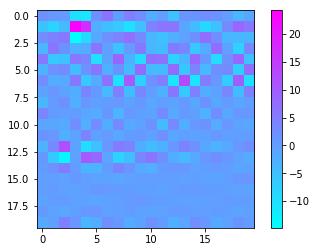

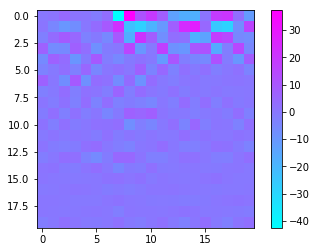

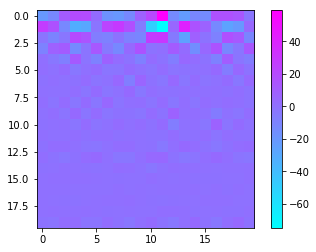

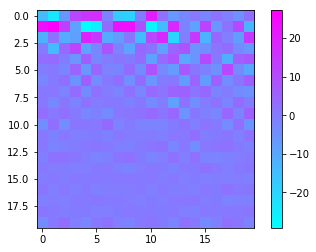

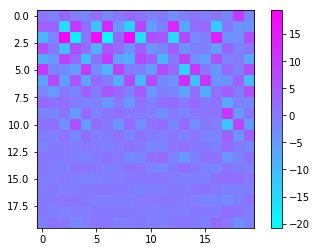

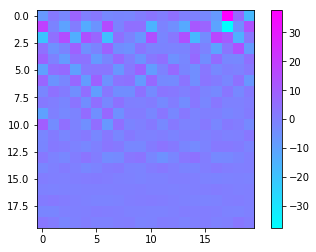

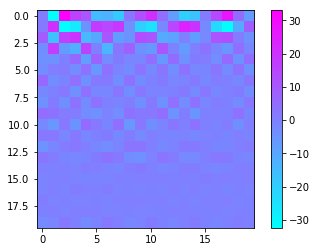

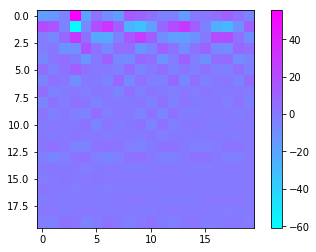

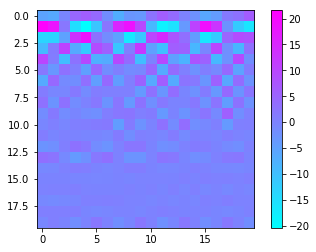

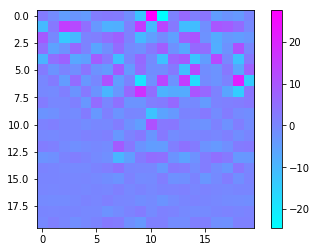

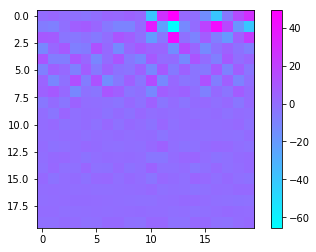

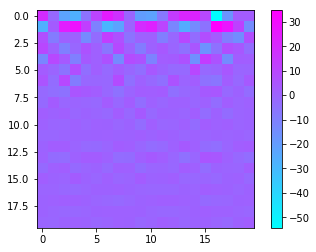

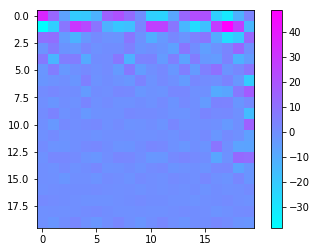

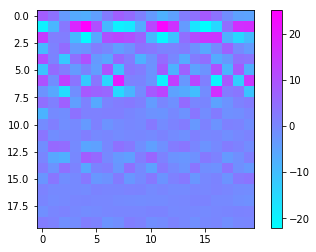

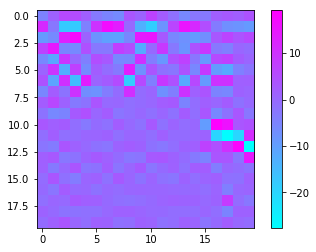

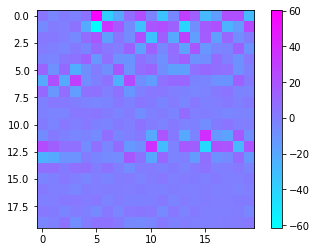

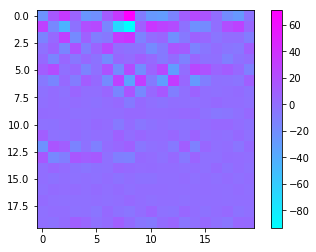

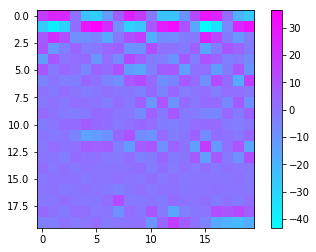

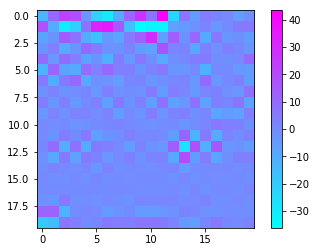

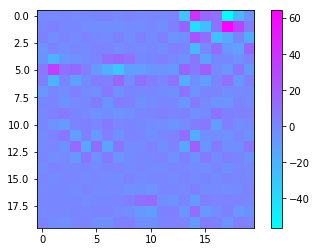

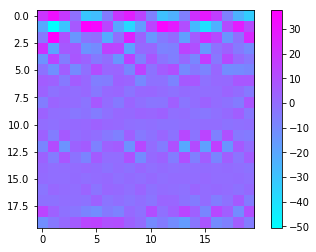

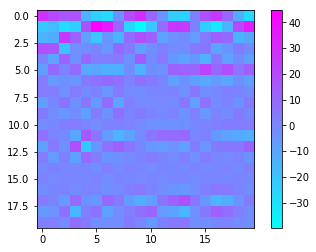

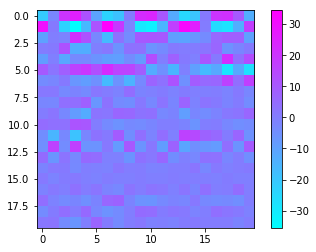

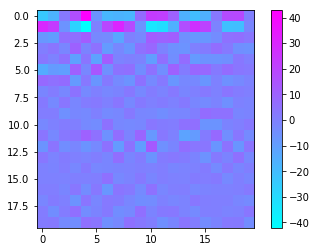

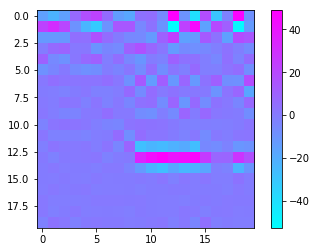

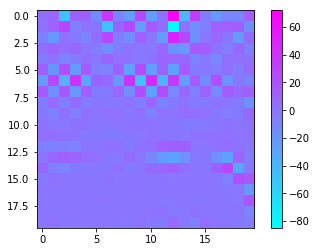

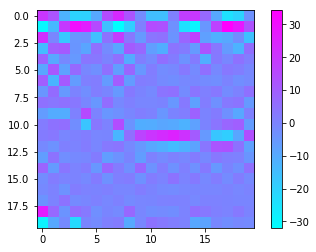

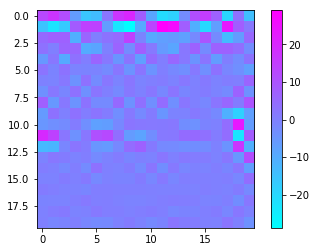

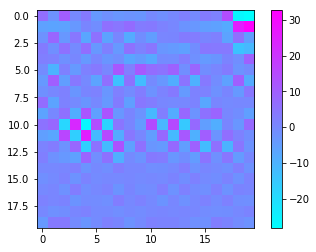

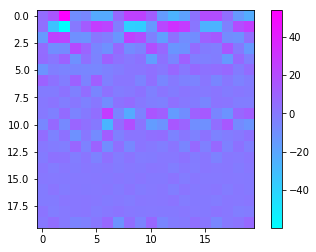

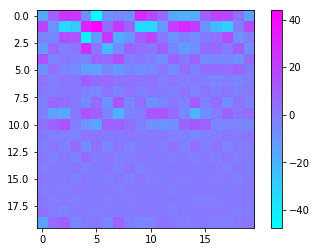

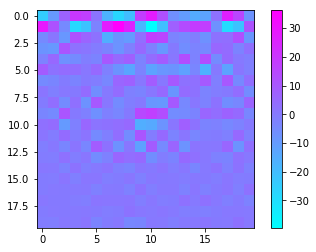

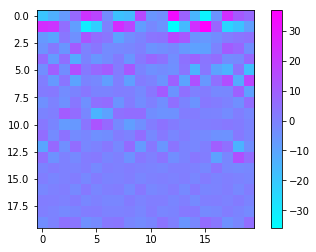

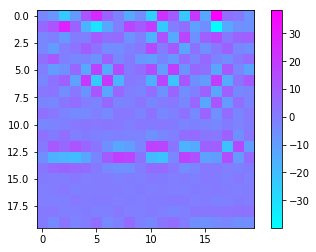

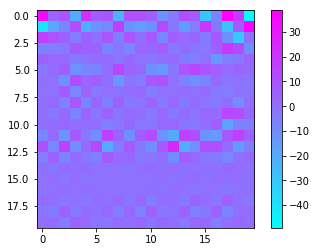

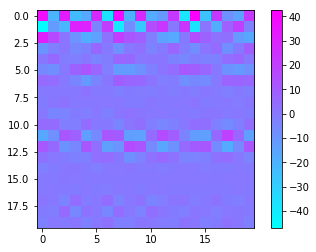

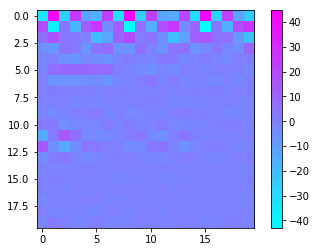

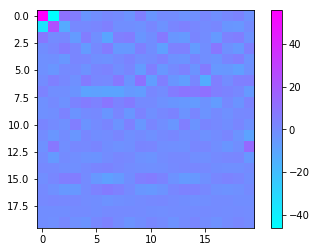

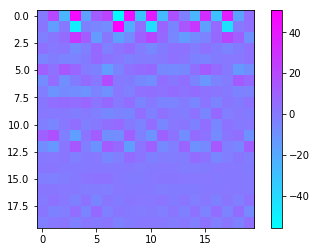

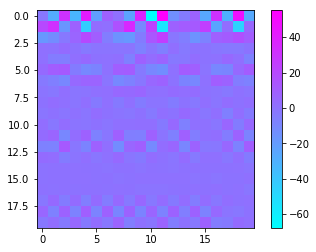

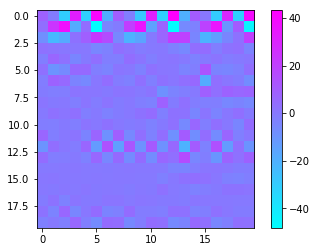

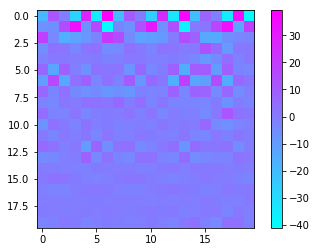

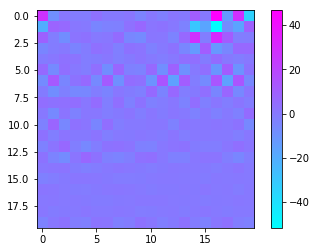

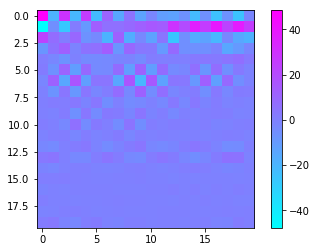

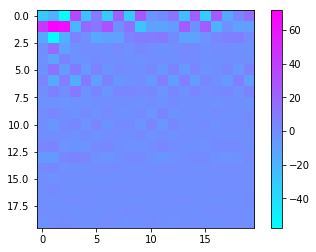

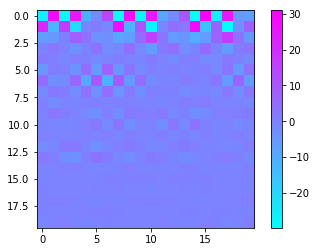

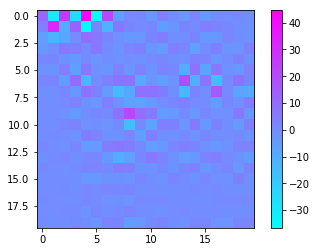

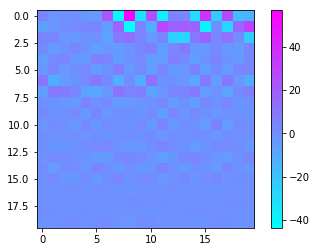

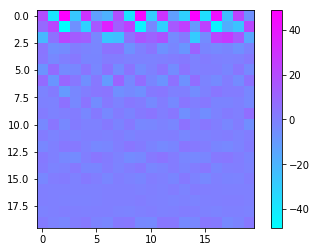

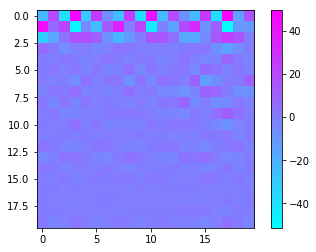

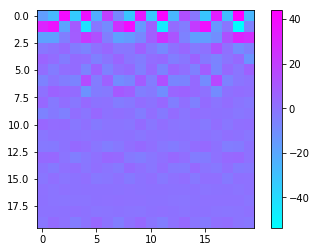

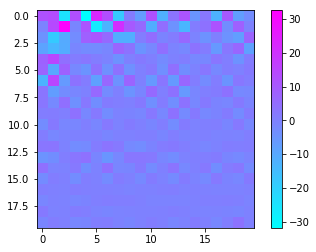

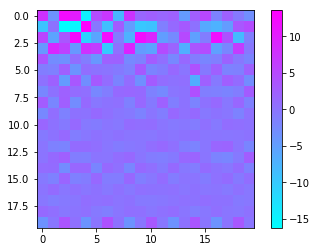

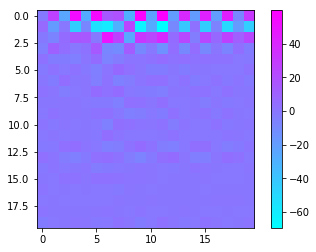

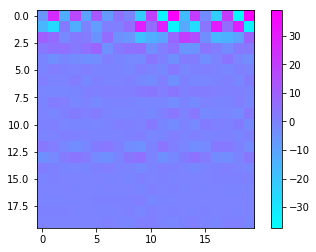

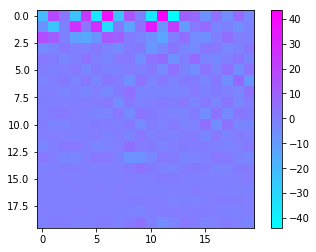

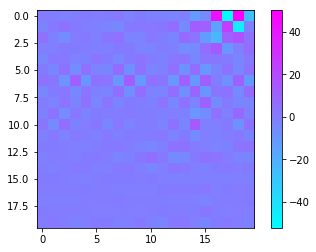

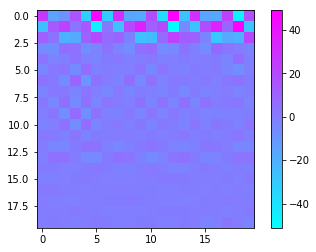

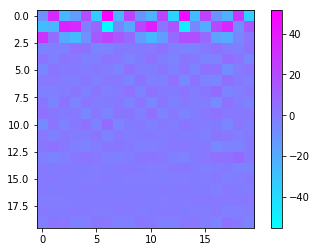

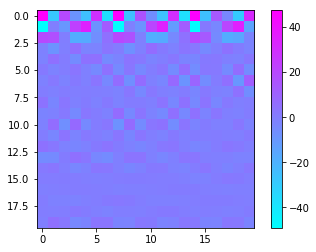

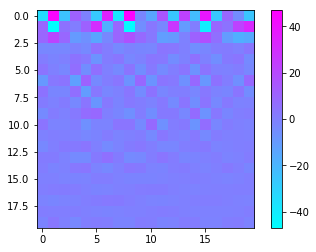

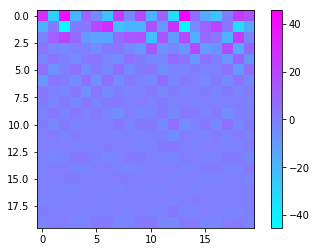

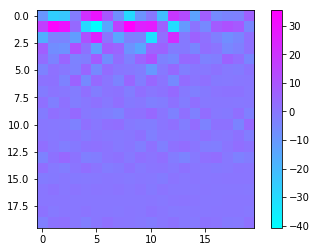

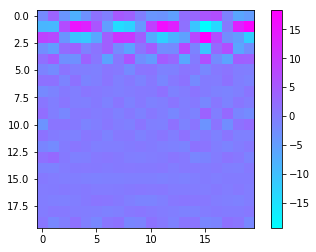

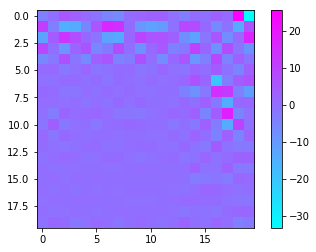

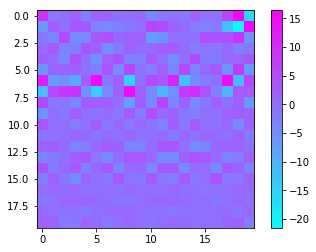

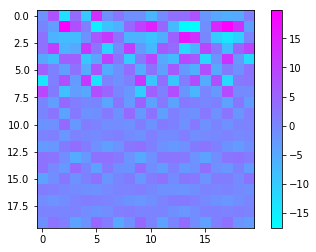

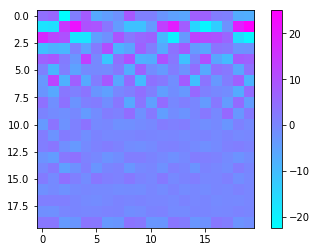

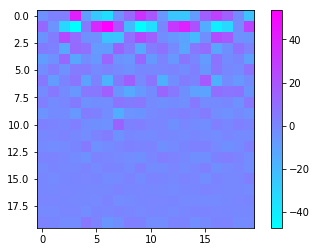

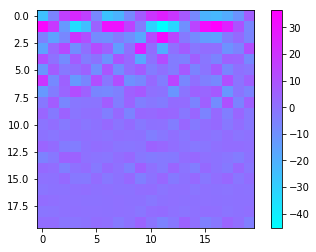

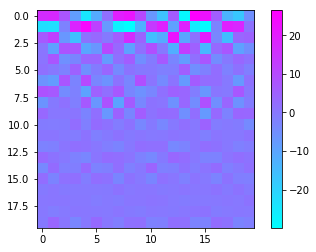

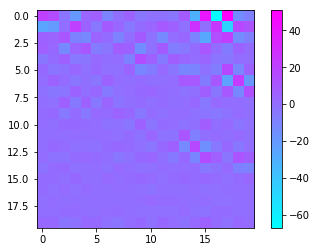

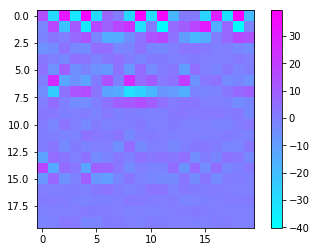

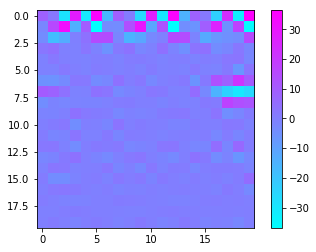

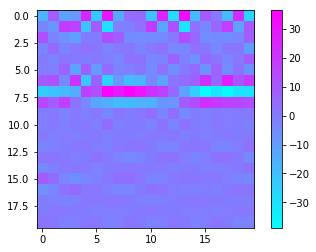

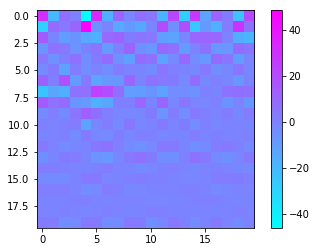

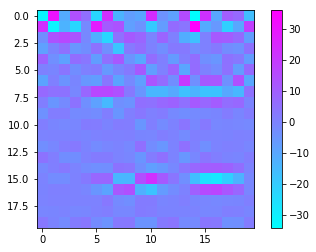

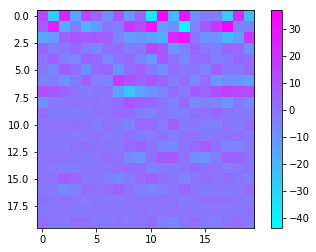

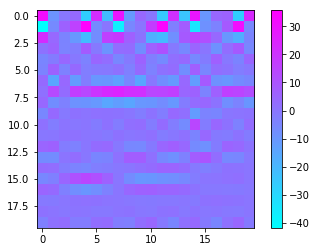

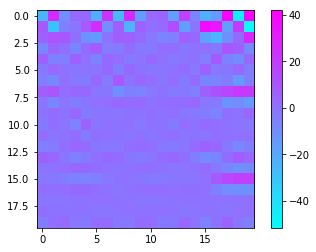

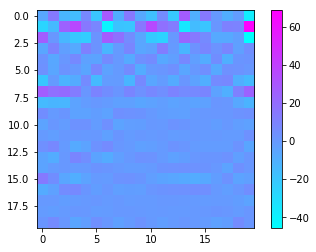

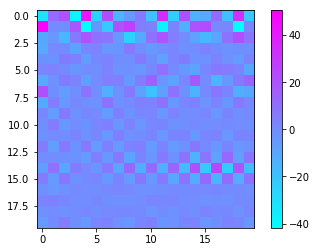

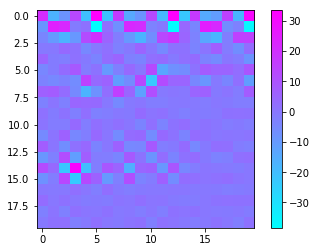

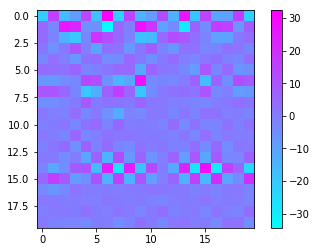

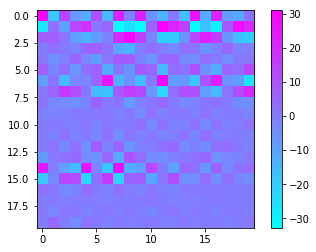

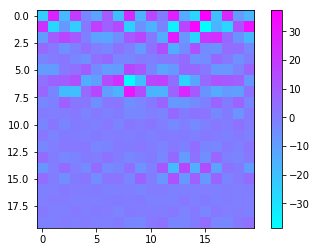

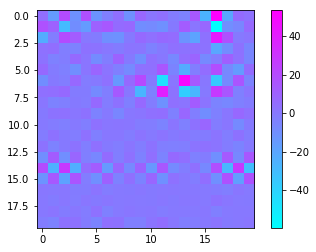

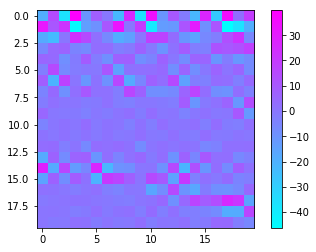

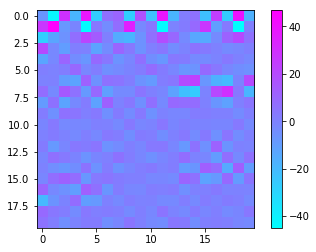

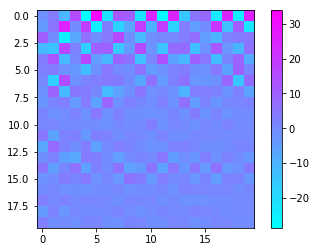

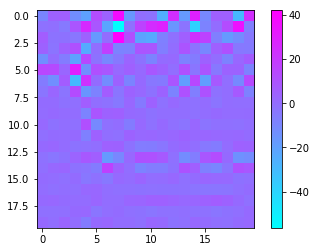

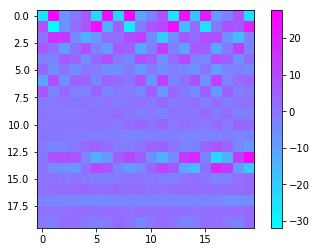

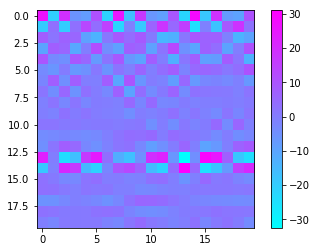

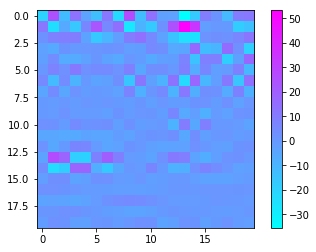

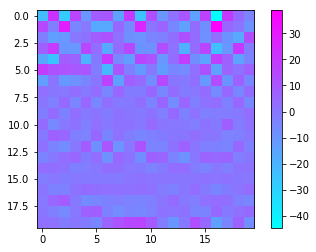

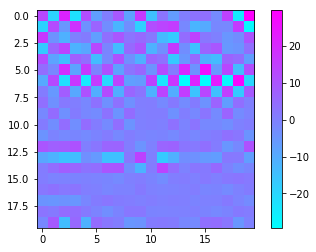

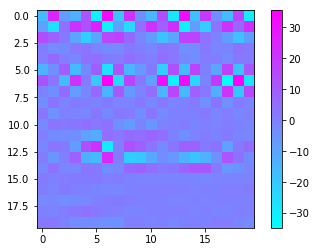

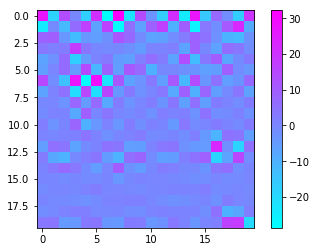

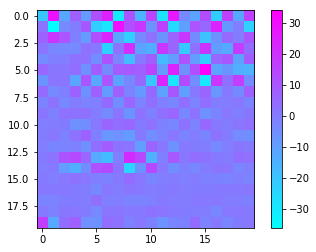

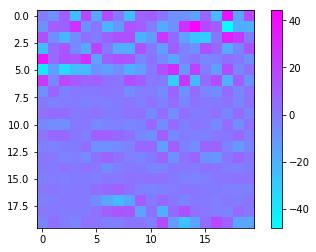

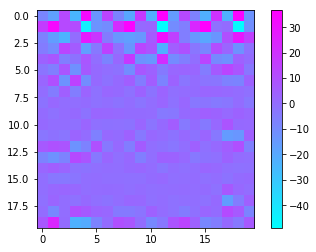

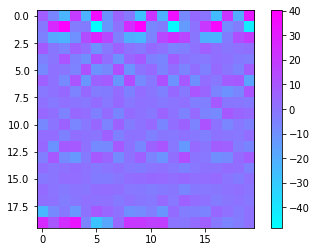

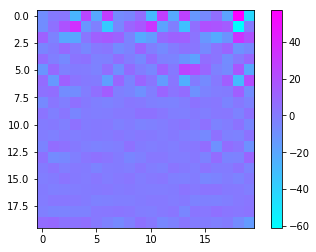

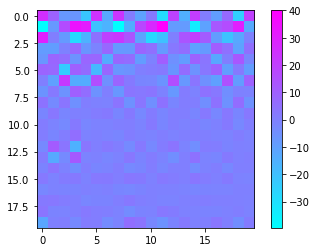

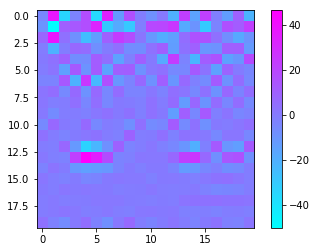

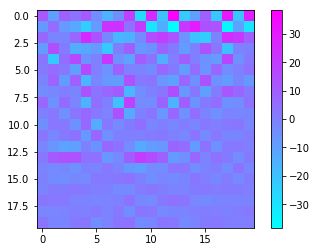

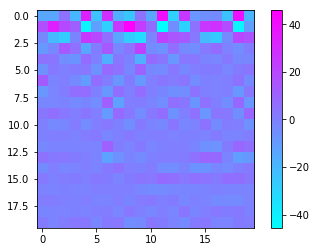

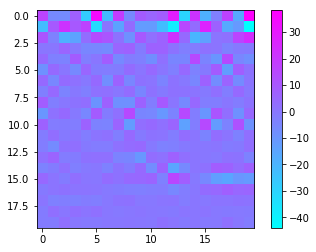

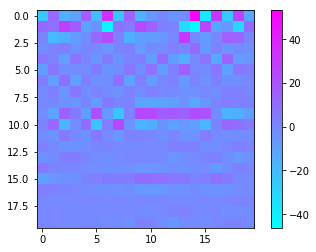

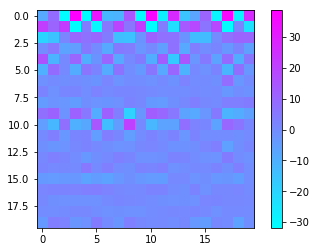

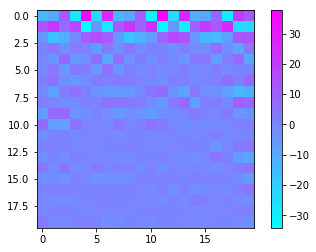

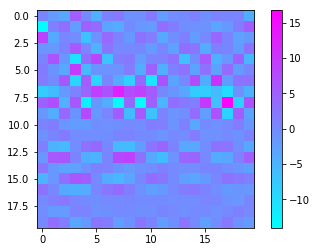

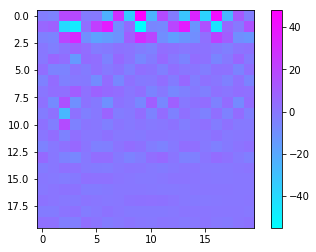

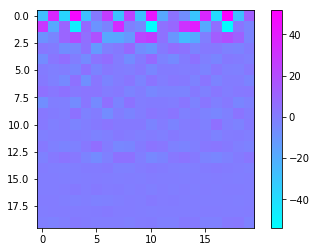

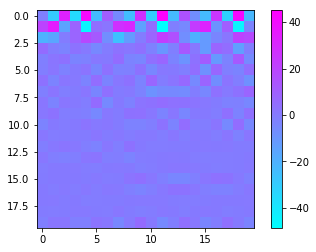

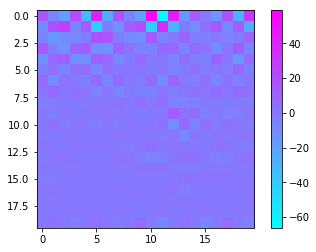

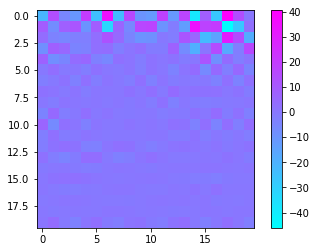

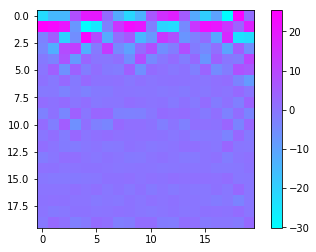

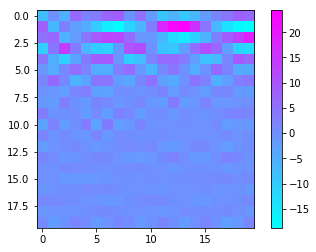

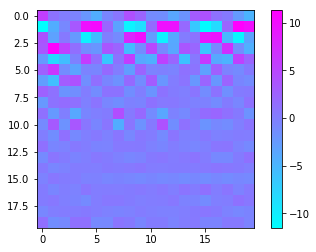

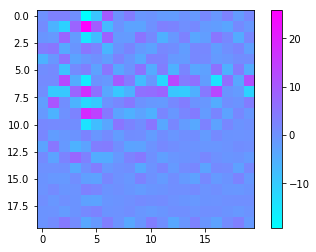

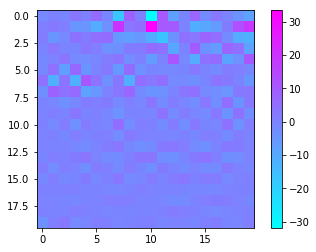

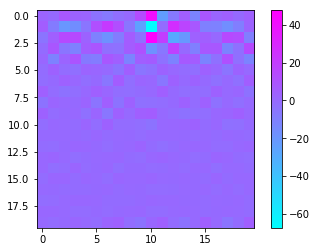

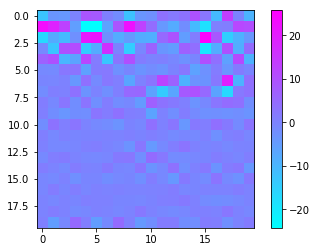

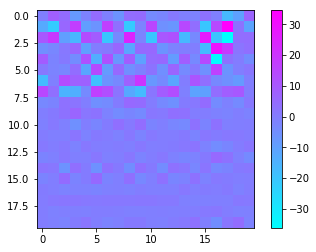

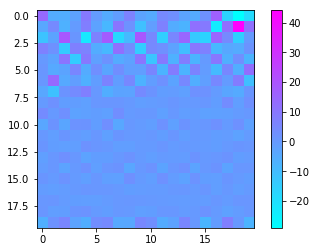

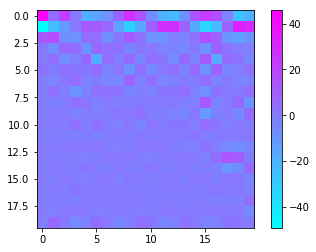

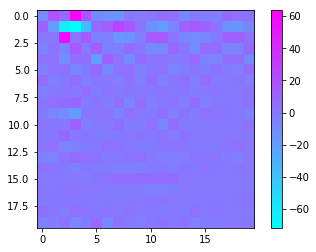

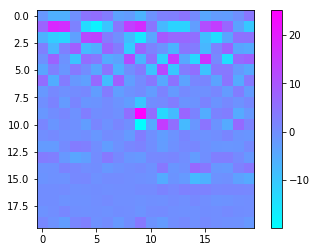

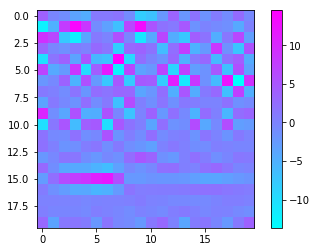

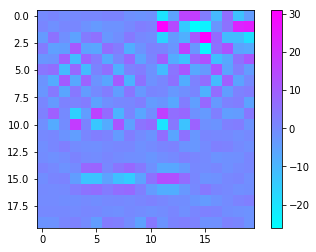

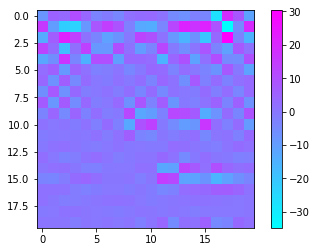

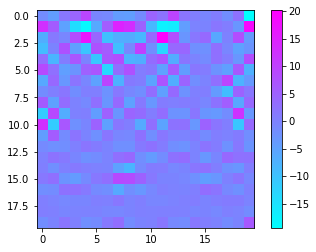

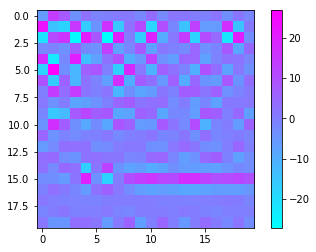

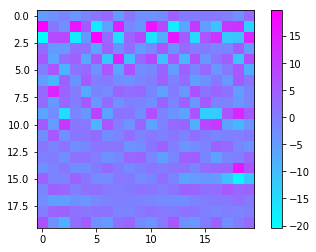

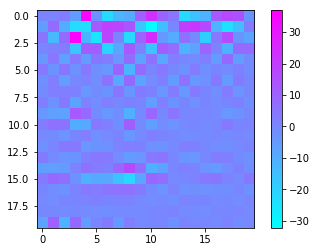

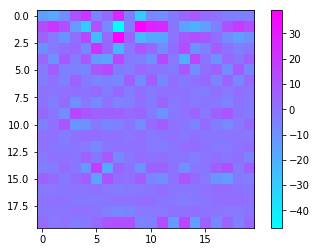

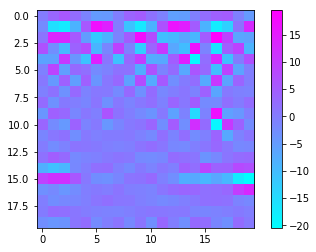

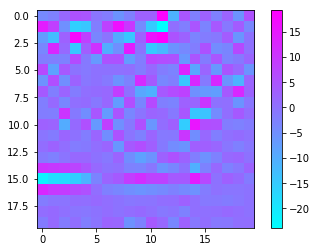

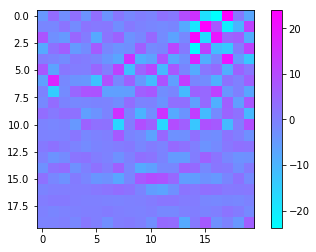

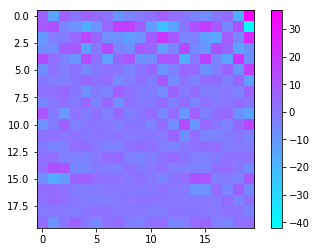

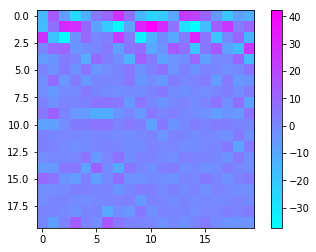

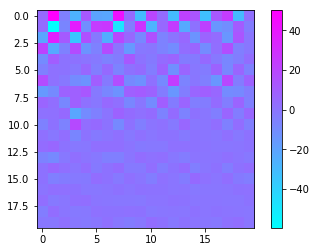

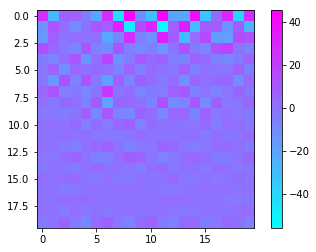

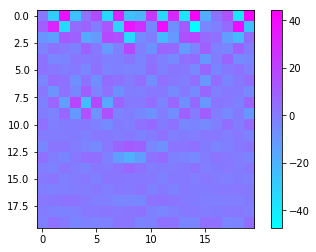

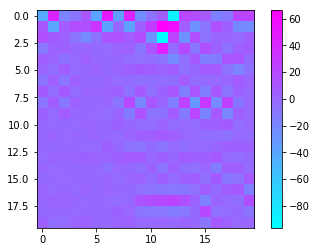

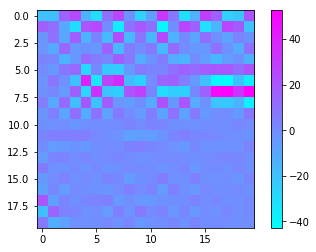

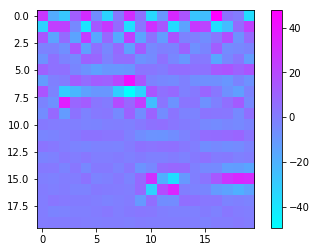

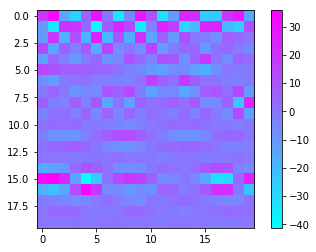

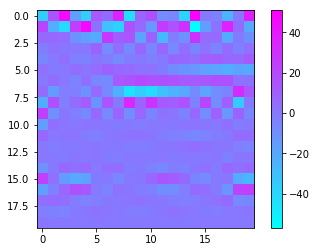

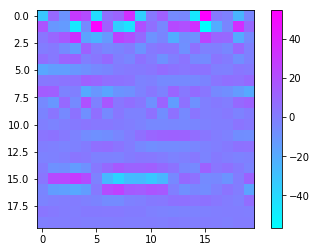

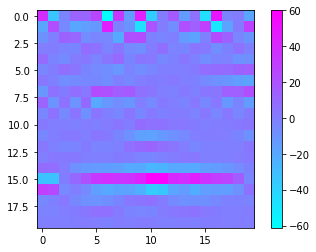

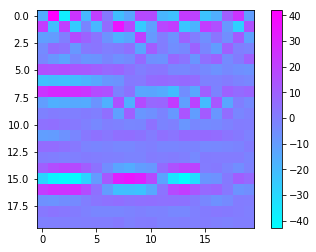

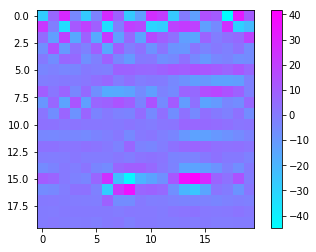

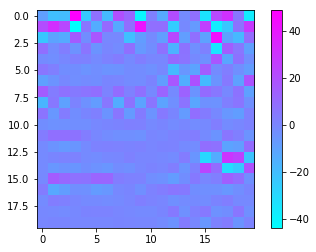

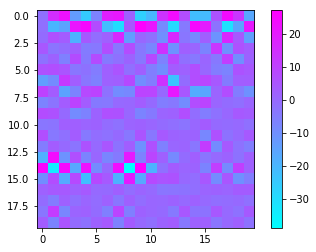

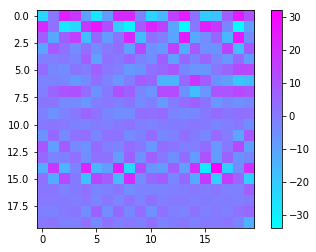

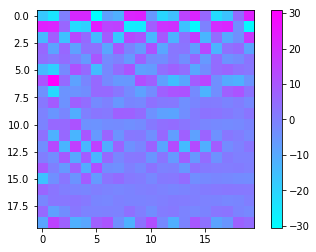

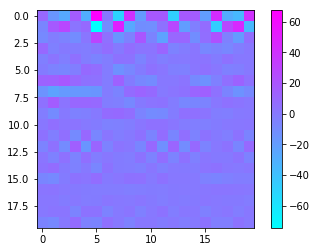

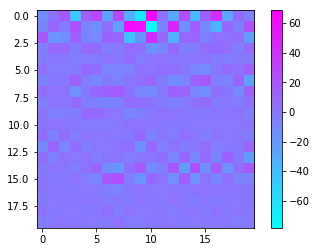

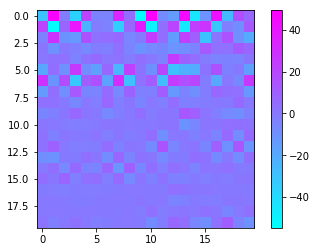

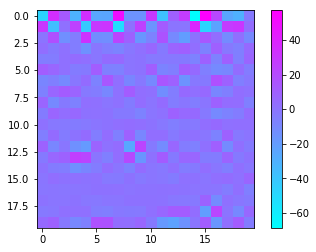

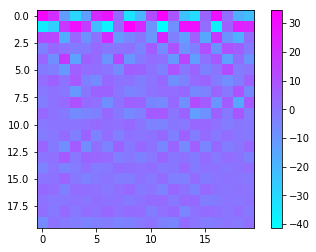

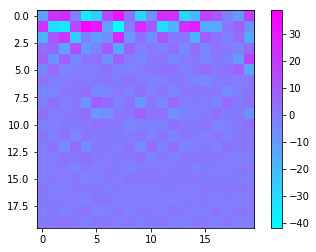

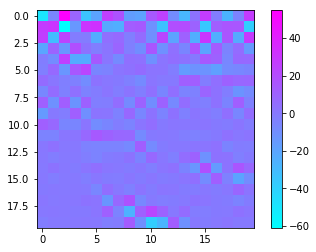

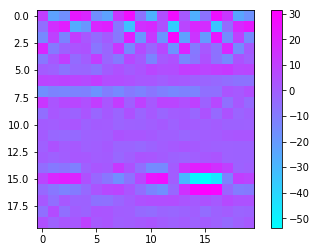

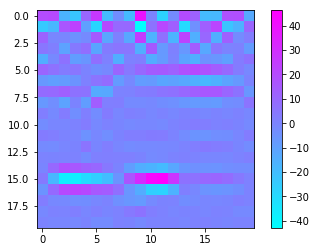

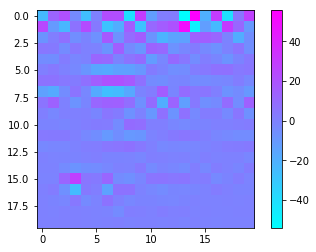

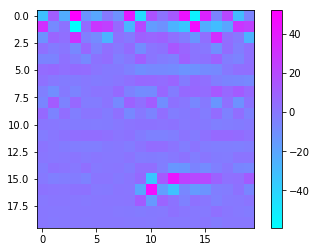

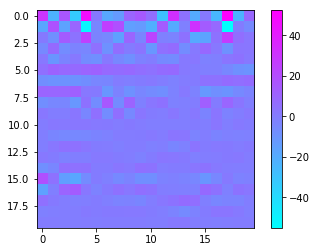

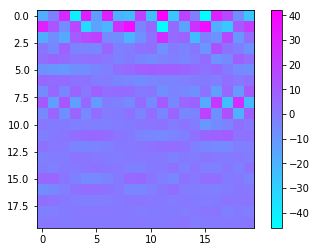

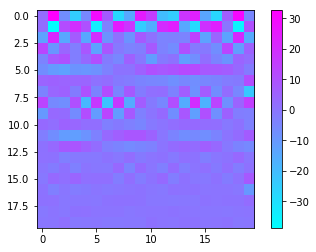

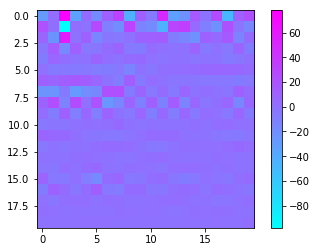

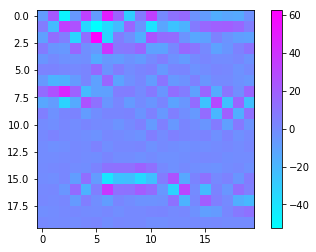

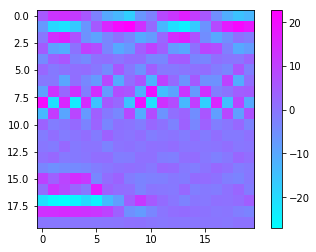

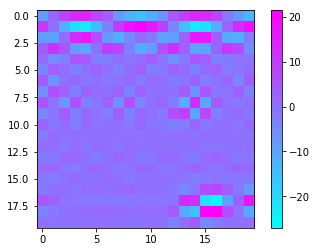

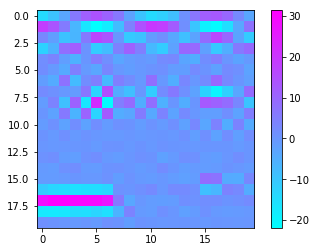

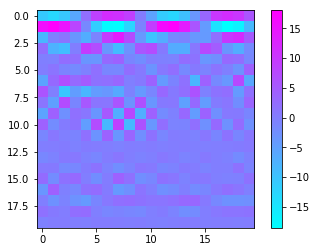

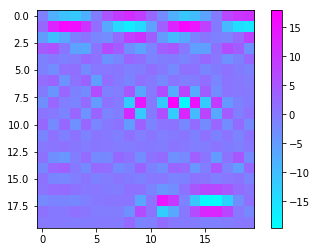

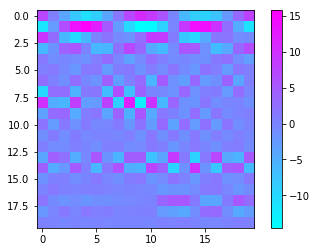

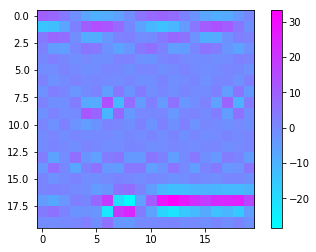

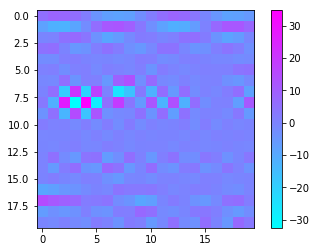

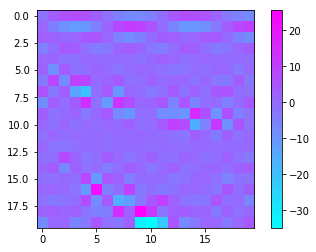

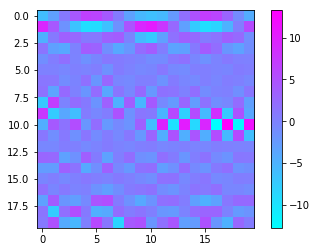

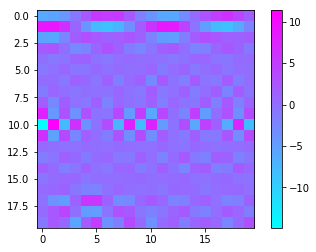

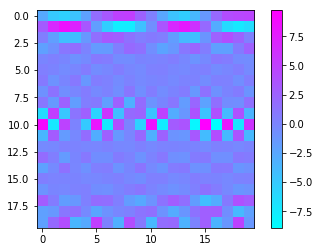

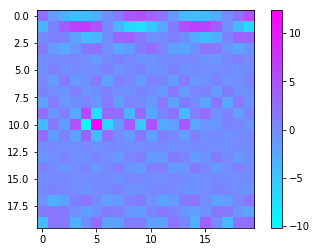

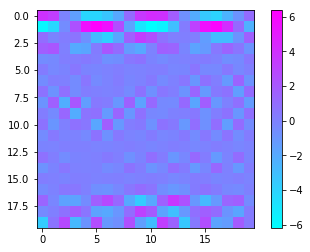

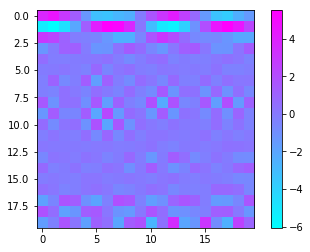

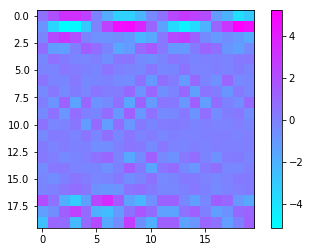

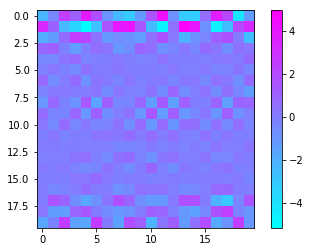

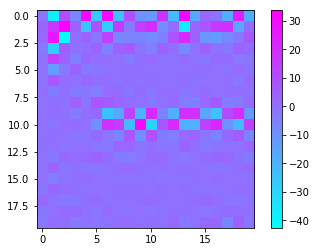

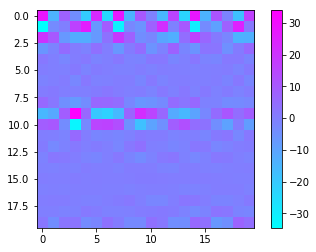

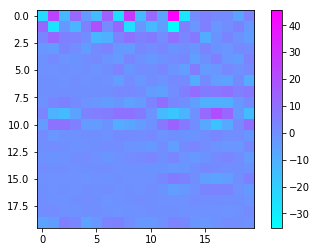

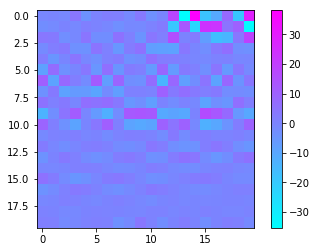

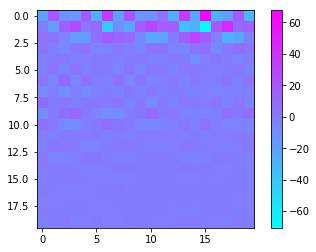

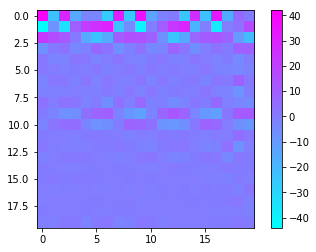

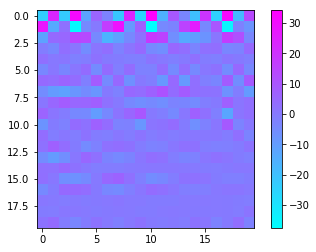

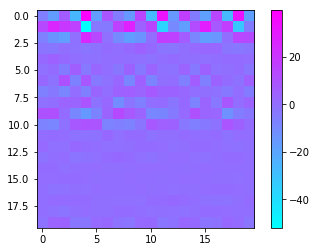

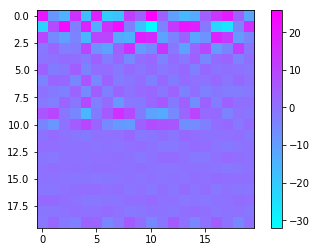

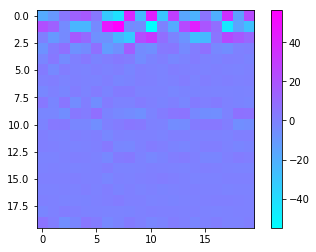

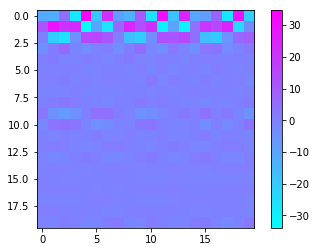

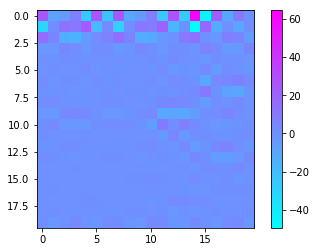

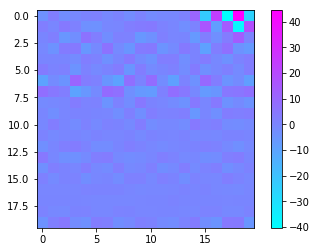

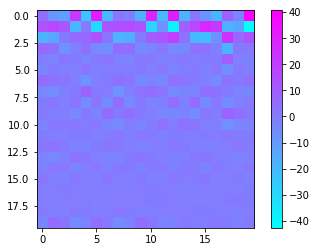

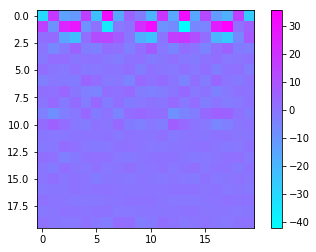

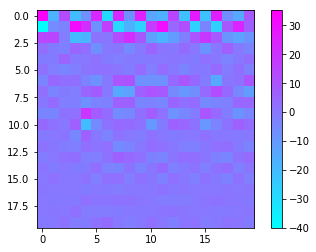

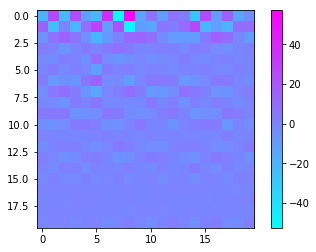

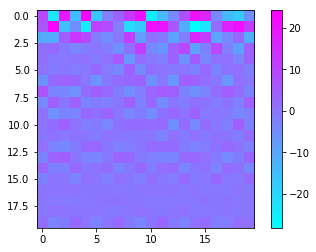

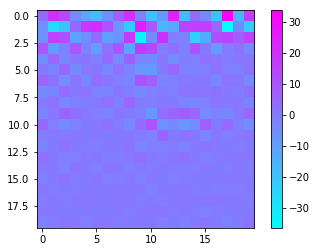

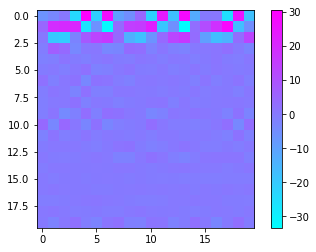

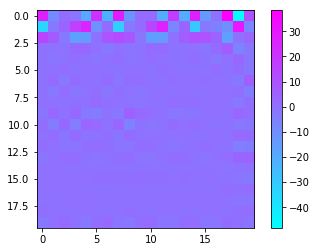

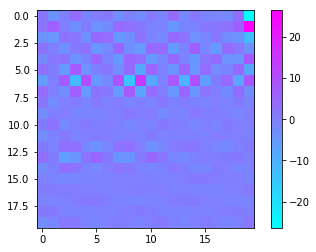

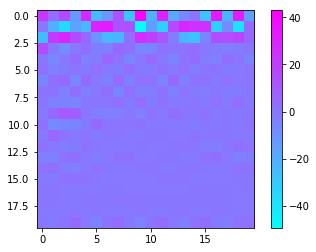

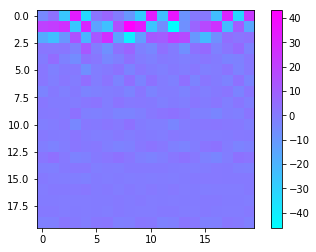

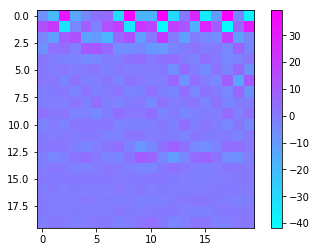

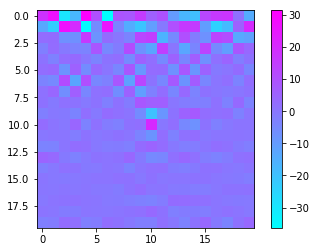

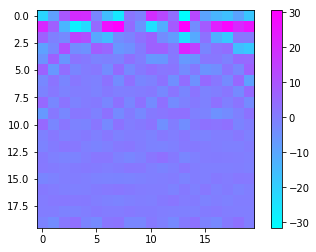

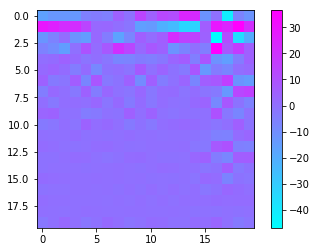

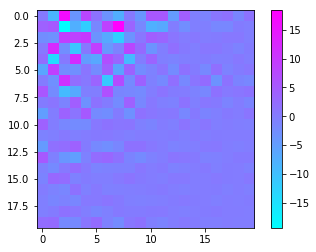

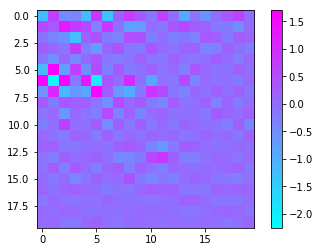

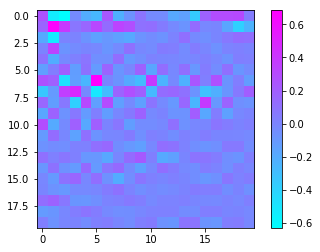

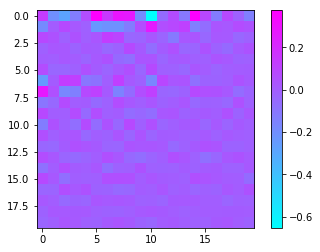

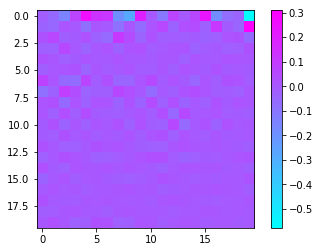

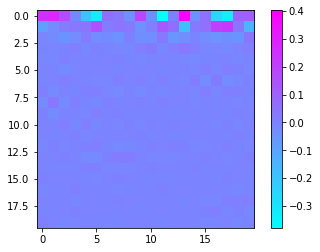

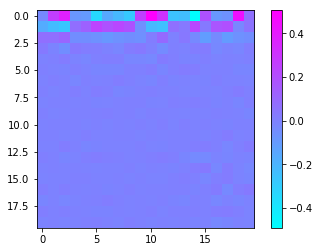

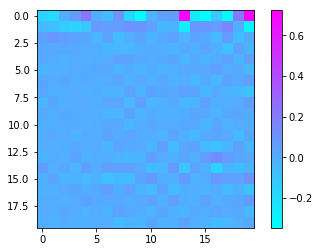

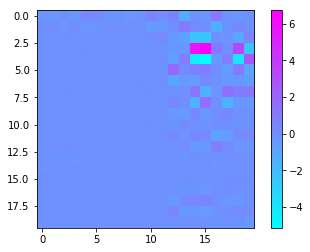

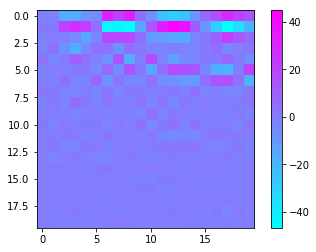

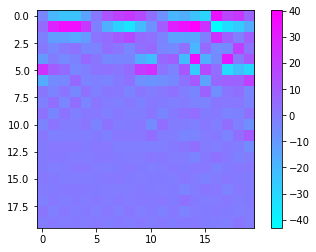

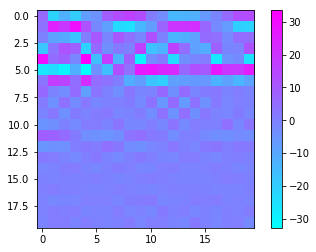

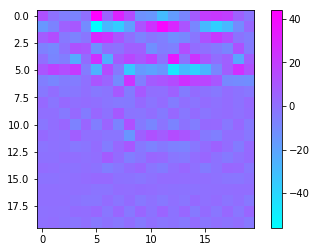

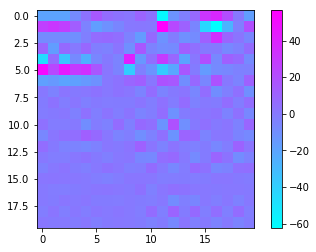

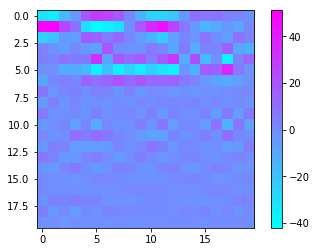

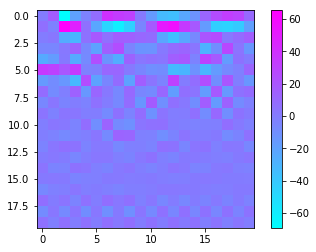

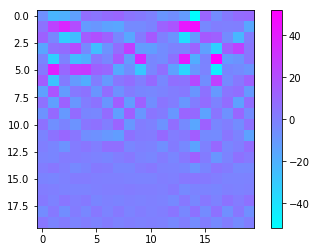

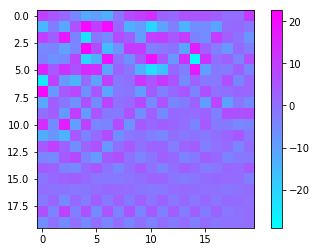

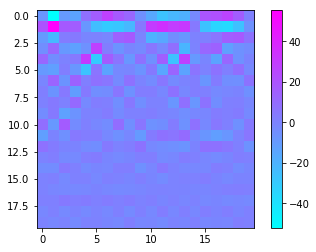

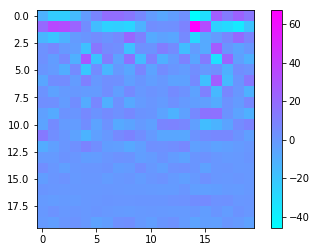

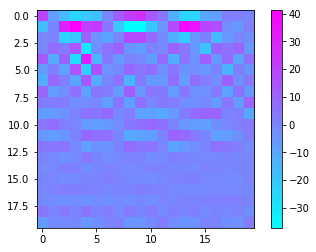

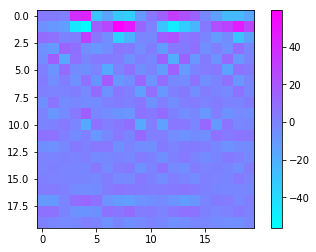

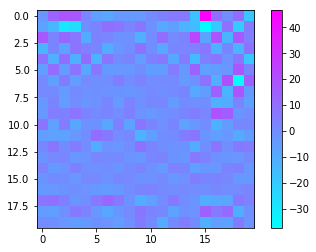

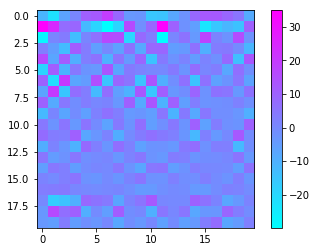

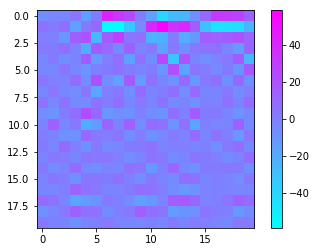

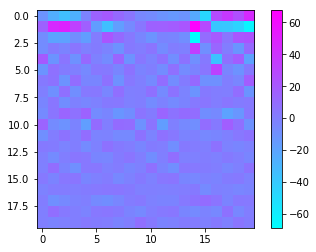

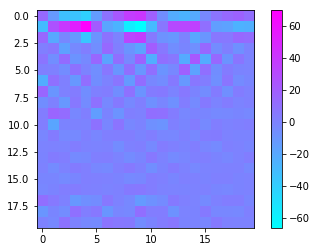

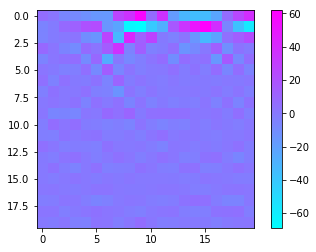

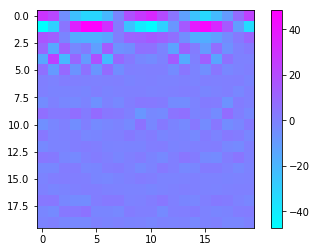

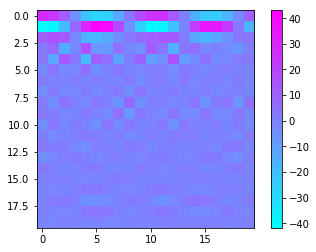

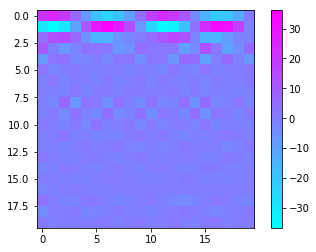

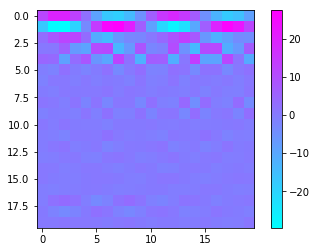

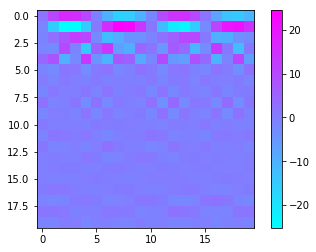

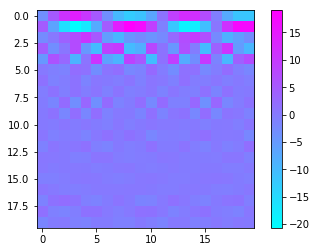

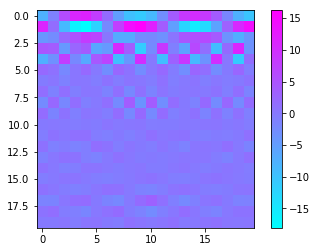

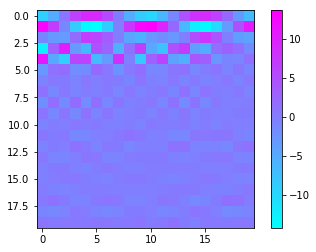

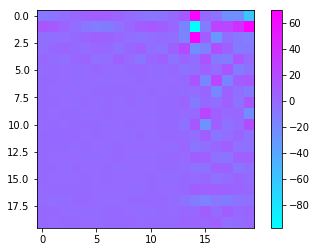

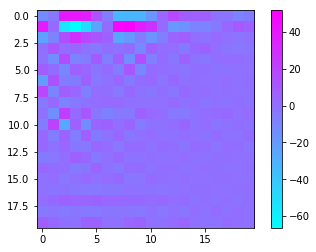

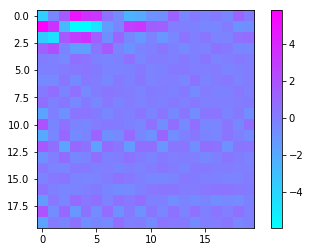

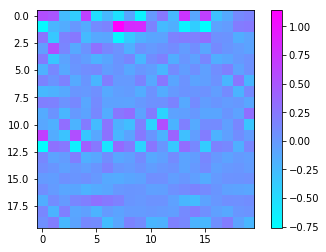

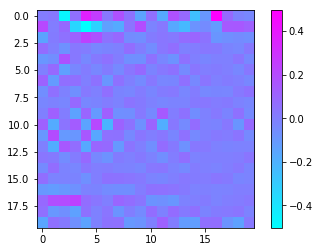

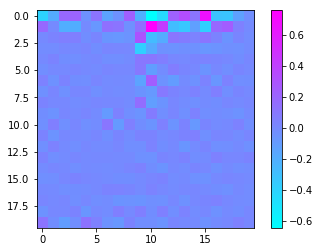

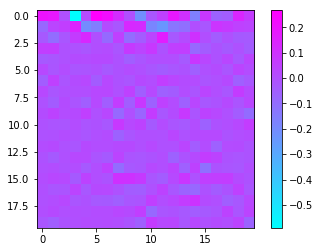

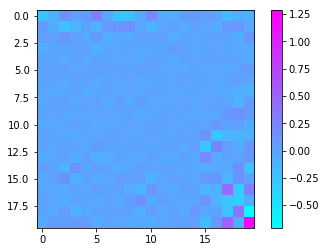

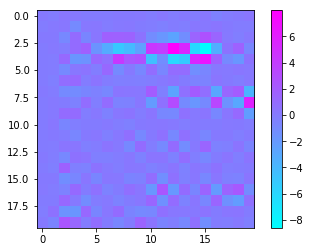

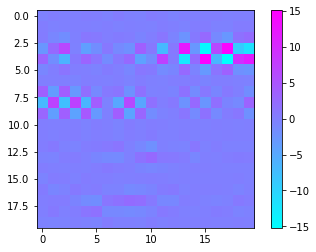

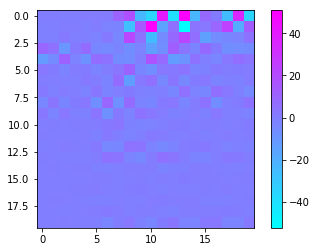

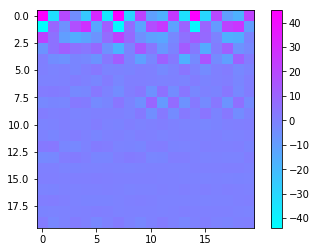

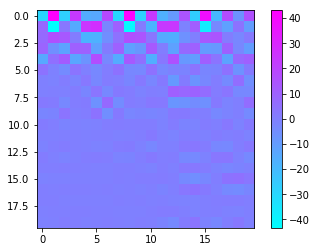

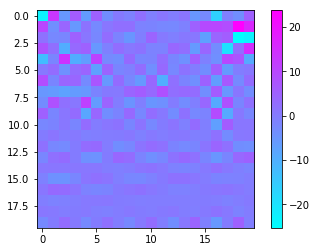

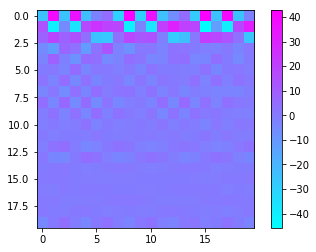

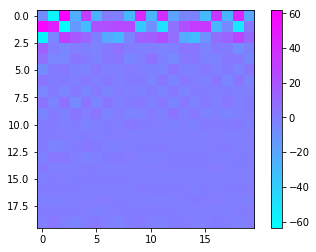

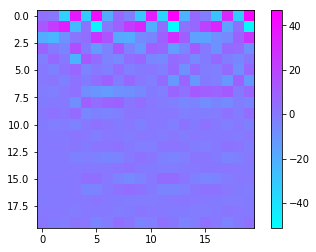

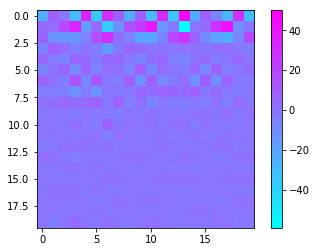

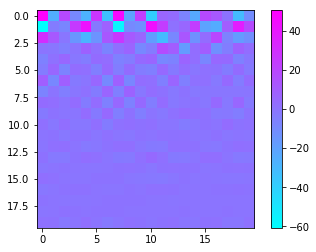

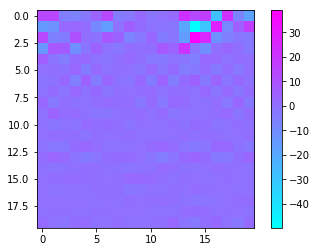

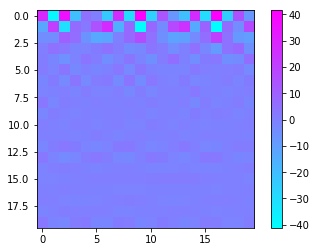

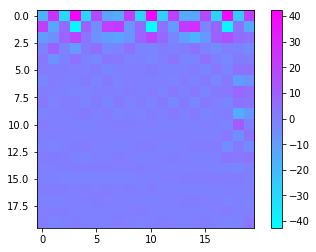

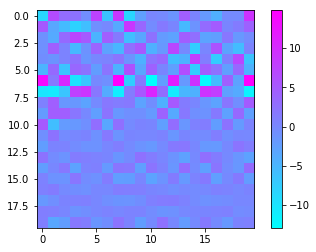

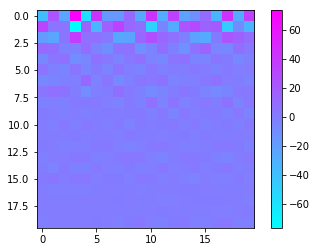

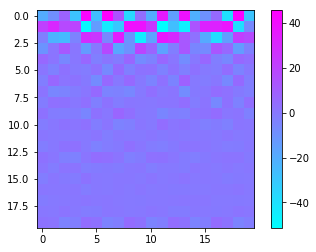

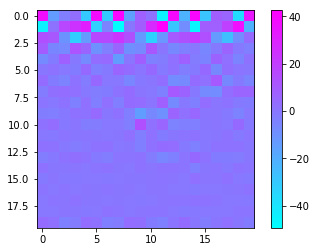

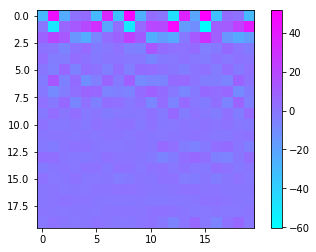

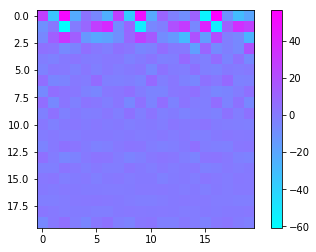

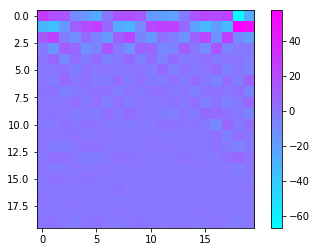

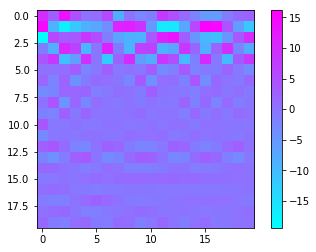

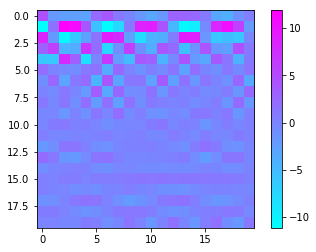

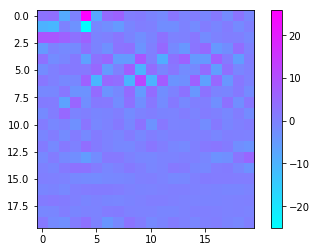

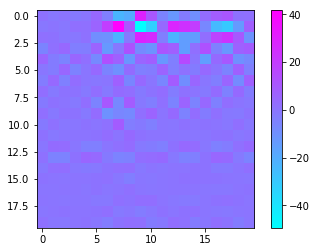

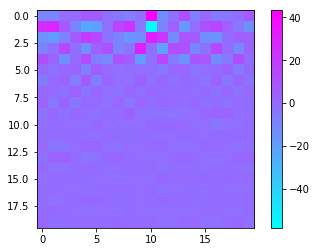

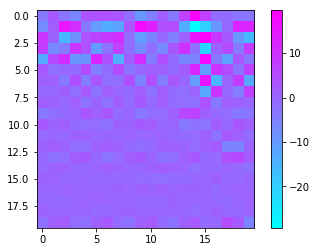

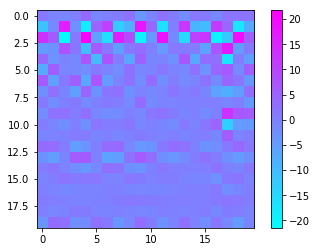

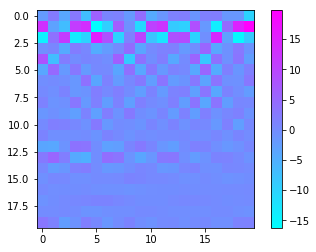

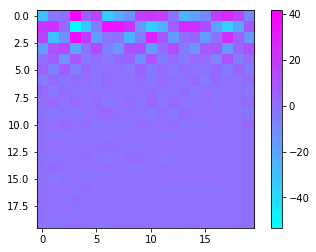

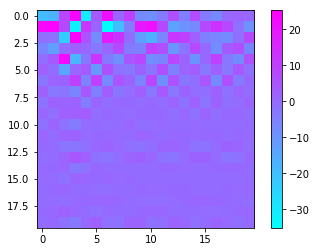

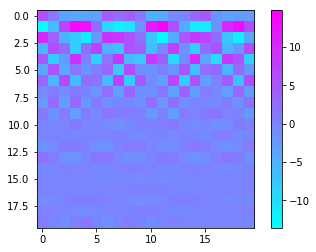

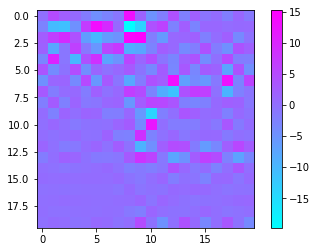

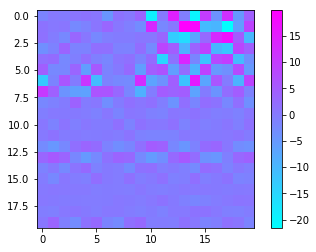

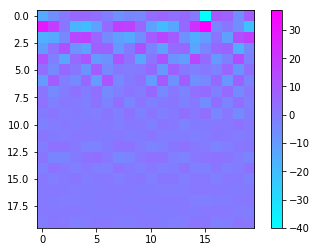

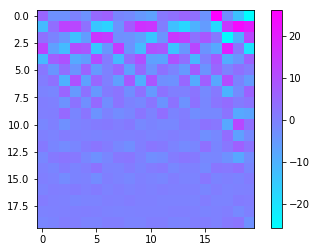

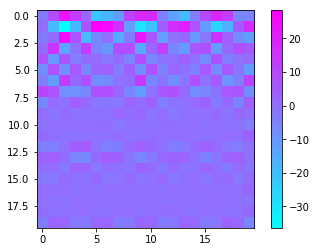

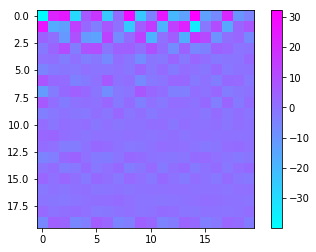

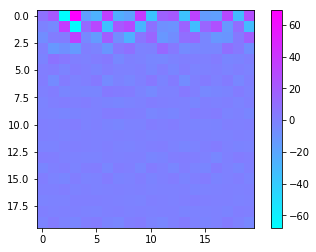

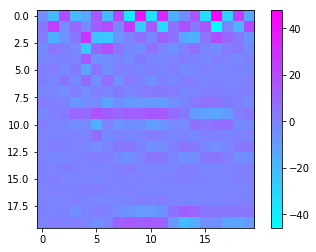

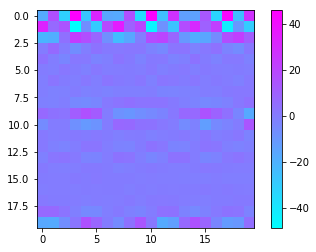

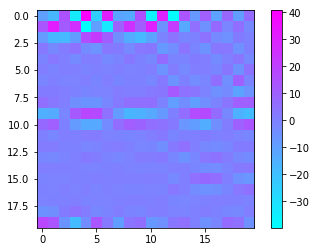

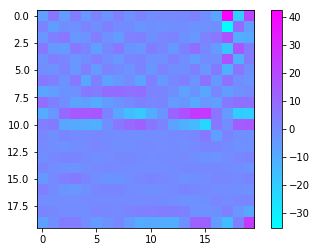

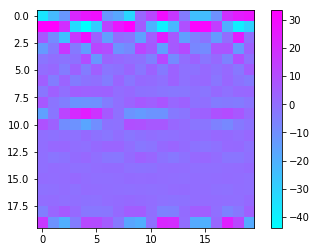

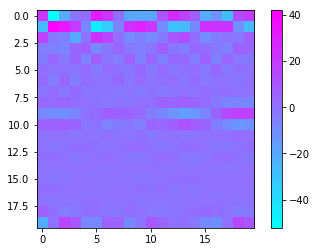

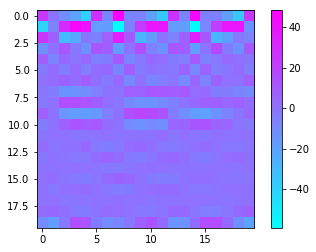

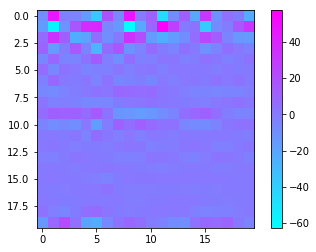

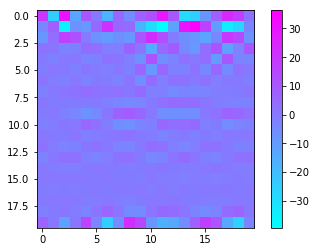

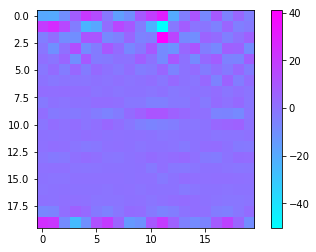

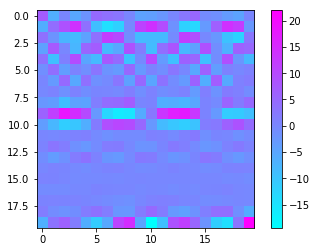

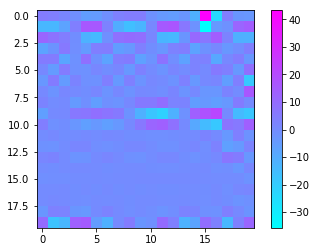

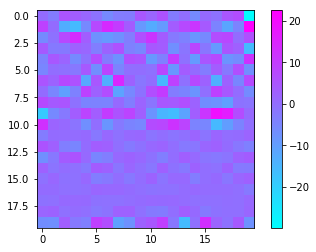

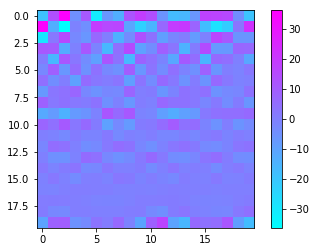

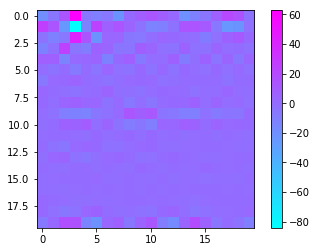

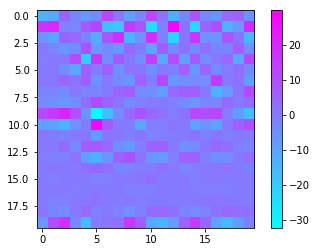

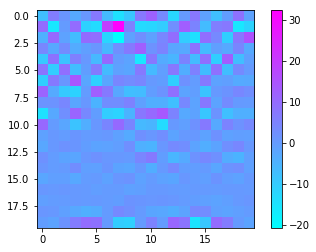

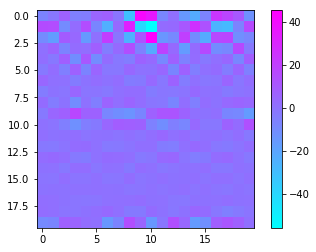

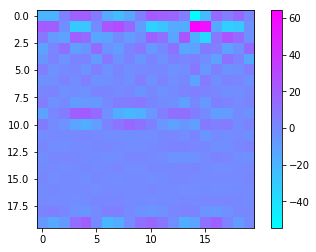

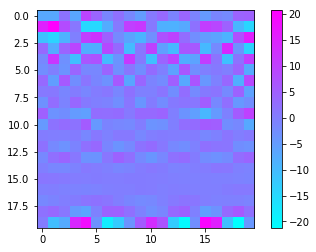

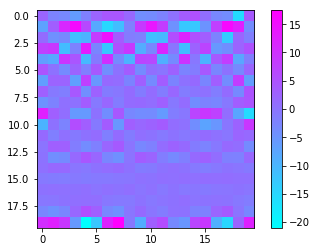

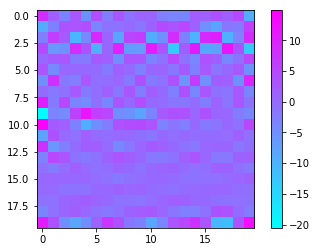

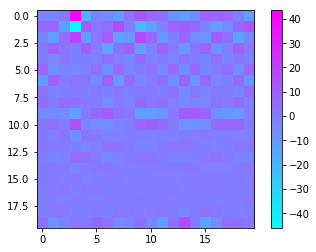

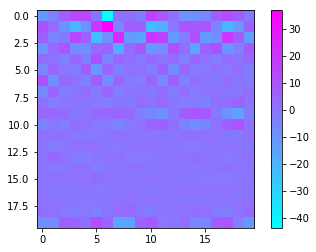

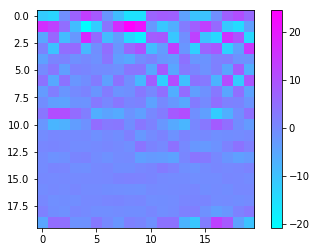

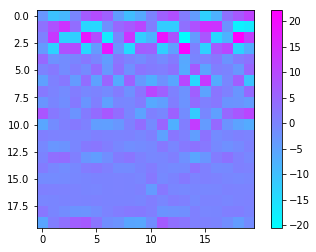

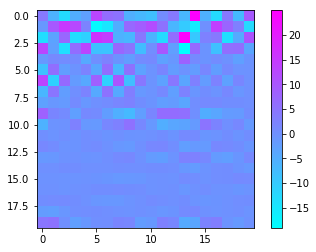

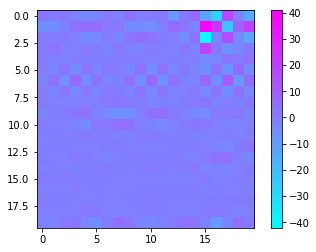

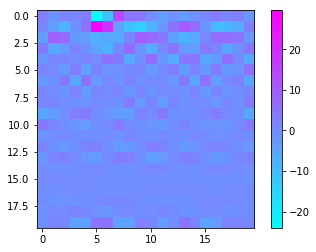

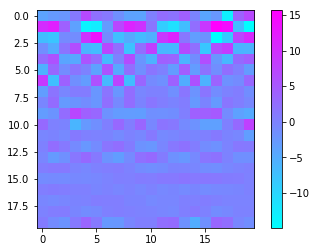

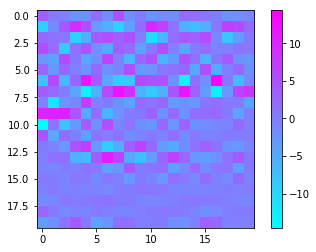

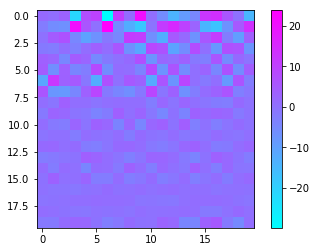

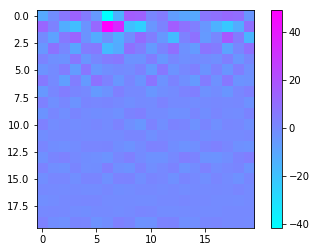

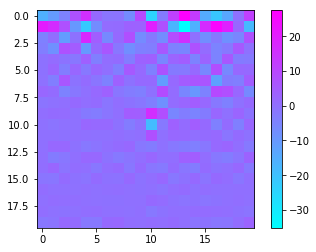

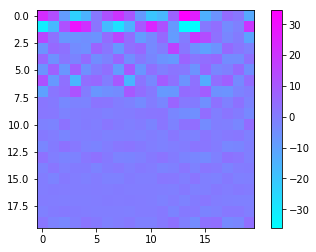

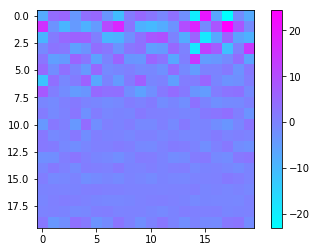

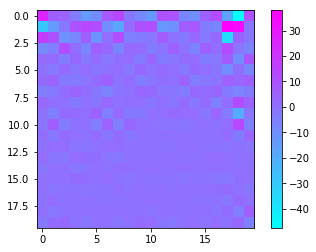

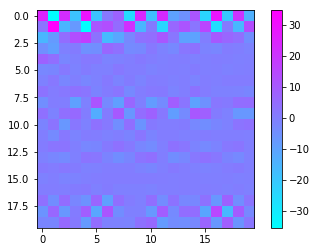

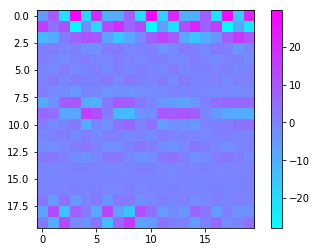

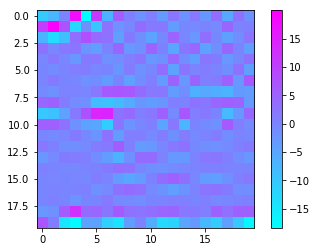

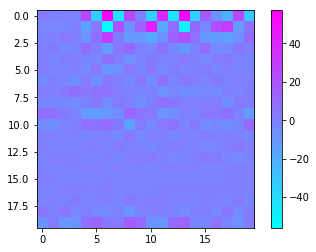

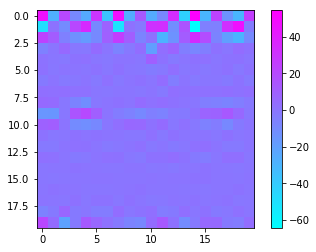

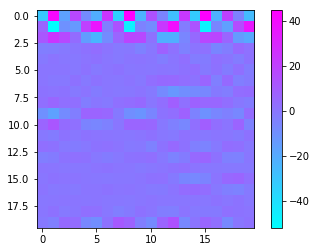

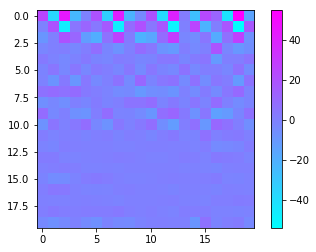

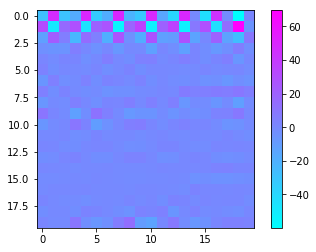

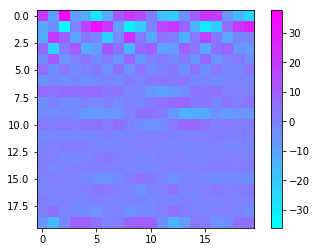

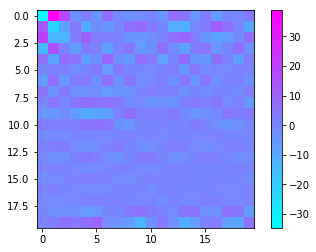

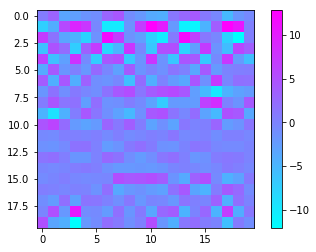

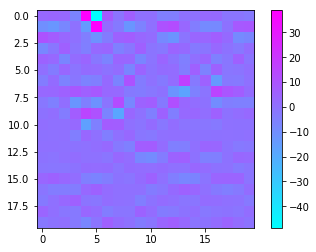

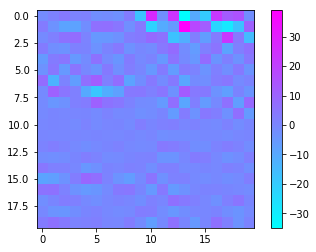

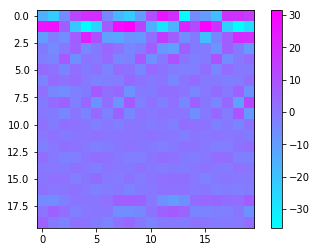

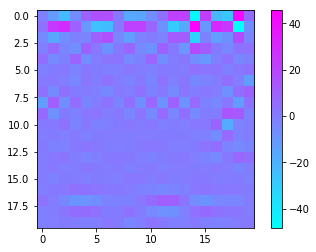

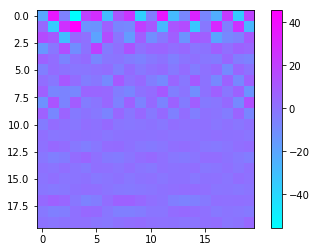

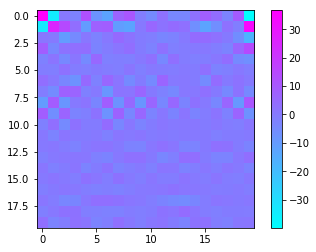

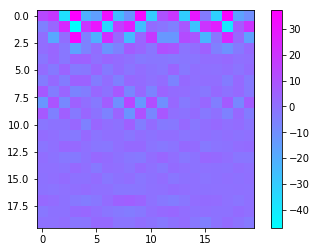

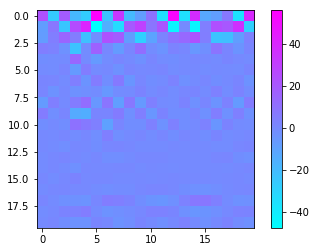

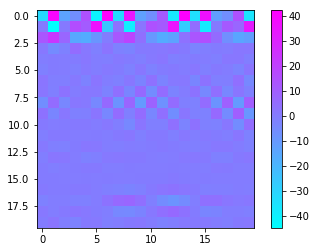

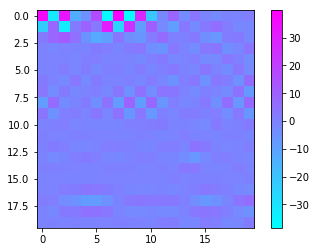

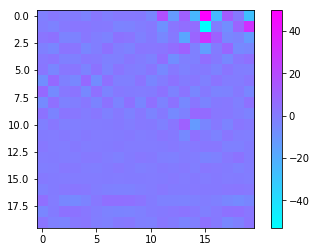

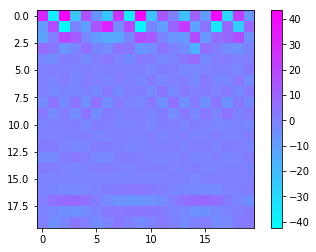

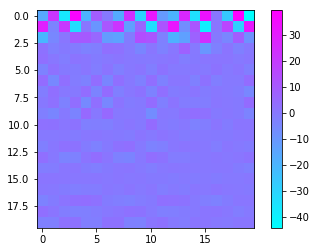

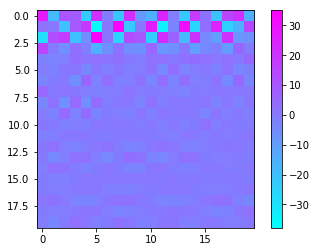

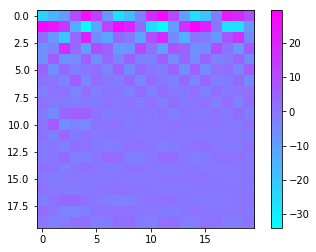

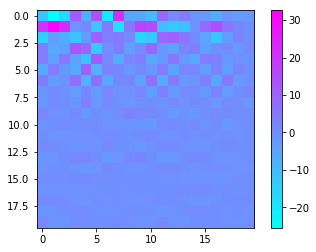

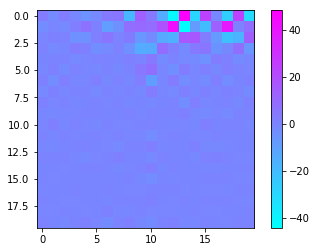

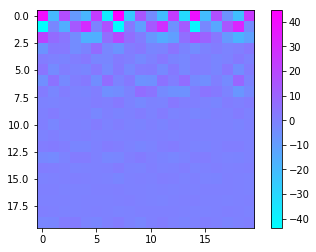

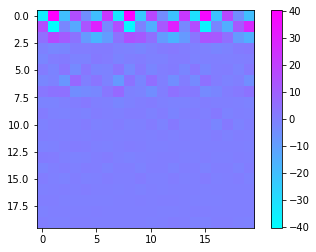

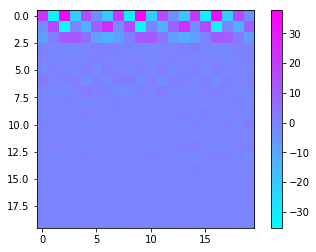

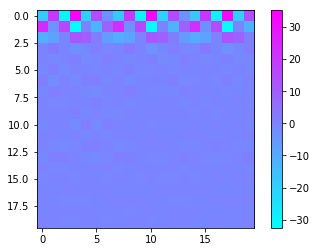

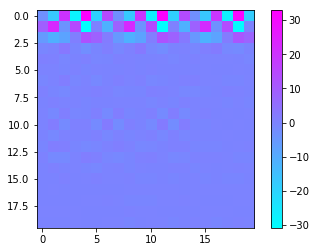

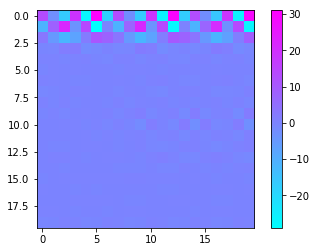

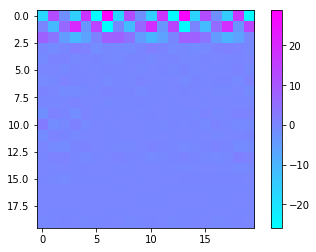

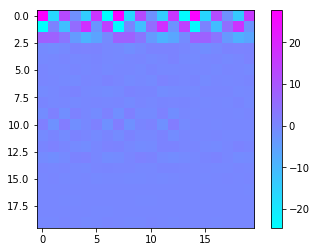

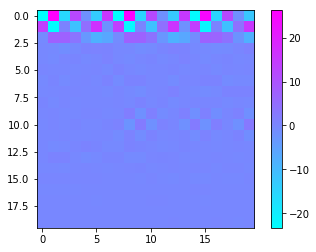

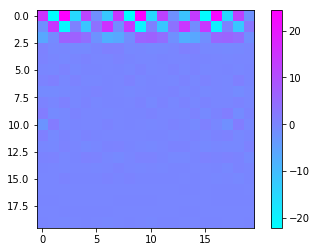

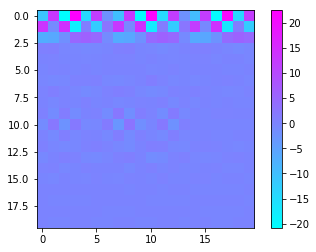

In [6]:
snapshot = 1000
fband = 20
red_dim = phase[0,0,:,:];

print(f"{red_dim.shape}")

for snapshot in range(1, 16000, fband):
    plt.imshow(red_dim[0:fband,snapshot:(snapshot+fband)].detach().numpy(), cmap='cool', interpolation='nearest')
    plt.colorbar()
    plt.show()
      


In [23]:
# configuration

dtype = torch.float

device = torch.device("cpu") # Uncomment this to run on CPU
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# XXX can probably pass num_workers=4
# we also need to use a batch size of 1 since we have a dimension mismatch 
# (i.e. there's a different amount of samples depending on the song)
dataloader = DataLoader(train_ds, batch_size=1, shuffle=True)
testloader = DataLoader(test_ds, batch_size=1, shuffle=True)

In [5]:
# hyperparams




In [6]:
# main training loop
for i, sample in enumerate(dataloader):
    # do something here.
    

AttributeError: 'list' object has no attribute 'size'